## **0. Deskripsi Dataset**

---

- **`developerCountry`**: Negara tempat developer aplikasi terdaftar. Ini bisa memberikan wawasan tentang kesadaran dan penerapan hukum privasi di wilayah tersebut. Nilai seperti "ADDRESS NOT LISTED IN PLAYSTORE" dan "CANNOT IDENTIFY COUNTRY" menunjukkan data yang hilang atau tidak dapat diambil.

- **`countryCode`**: Pasar atau wilayah target dari aplikasi (misalnya, GLOBAL, NA, EMEA, LATAM, APAC). NA kemungkinan berarti North America. GLOBAL adalah kategori umum, sedangkan yang lain lebih spesifik secara geografis.

- **`userRatingCount`**: Jumlah total rating yang diberikan pengguna terhadap aplikasi.

- **`primaryGenreName`**: Kategori utama tempat aplikasi tersebut terdaftar (misalnya, Games, Books & Reference, Education, dll.).

- **`Downloads`**: Perkiraan jumlah unduhan aplikasi dalam bentuk rentang (misalnya, "100000 - 500000").

- **`deviceType`**: Jenis perangkat yang kompatibel dengan aplikasi (misalnya, smartphone, tablet, connected-tv/ott, undetermined).

- **`hasPrivacyLink`**: Menunjukkan apakah daftar aplikasi mencantumkan tautan ke kebijakan privasi. Keberadaan tautan ini merupakan langkah awal dalam kepatuhan.

- **`hasTermsOfServiceLink`**: Menunjukkan apakah aplikasi menyediakan tautan ke Terms of Service.

- **`hasTermsOfServiceLinkRating`**: Rating (misalnya, "low", "medium", "high") yang kemungkinan menunjukkan kualitas atau kelengkapan dari Terms of Service tersebut.

- **`isCorporateEmailScore`**: Skor (kemungkinan antara 0 sampai 100) yang menunjukkan seberapa besar kemungkinan email developer merupakan email korporat dibandingkan email pribadi. Skor yang lebih tinggi bisa menunjukkan developer yang lebih profesional dan mungkin lebih patuh terhadap kebijakan privasi.

- **`adSpent`**: Jumlah uang yang dikeluarkan untuk iklan.

- **`appAge`**: Usia aplikasi dalam satuan hari (kemungkinan sejak aplikasi dirilis di app store). Aplikasi yang lebih tua mungkin lebih jarang diperbarui mengikuti praktik privasi terbaru.

- **`averageUserRating`**: Rata-rata rating pengguna terhadap aplikasi (misalnya, skala 1 sampai 5).

- **`appContentBrandSafetyRating`**: Rating (misalnya, "low", "medium", "high") yang mencerminkan kesesuaian konten aplikasi untuk audiens umum. Ini tidak langsung berkaitan dengan privasi, tetapi lebih ke moderasi konten.

- **`appDescriptionBrandSafetyRating`**: Rating kategorikal yang mirip dengan di atas, tetapi khusus mengevaluasi deskripsi aplikasi, bukan aplikasinya secara langsung.

- **`mfaRating`**: Rating kategorikal (misalnya, "low", "medium", "high") yang kemungkinan berhubungan dengan "Made for Advertising Apps" (aplikasi yang dirancang untuk tujuan iklan).

- **`coppaRisk`**: Variabel target yang menunjukkan apakah aplikasi ini berisiko tidak mematuhi aturan COPPA (Children’s Online Privacy Protection Act).

---

## **1. Install Dependency**

In [ ]:
!pip install -q --upgrade numpy==1.26.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 504.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install -q optuna optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.2 MB/s eta 0:00:00


In [ ]:
!pip install -q catboost
!pip install -q xgboost
!pip install -q lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


## **2. Import Dependency**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold, cross_val_score
import optuna
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report
import joblib

## **3. Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Coding Camp DBS/Machine Learning Terapan/dataset

/content/drive/MyDrive/Coding Camp DBS/Machine Learning Terapan/dataset


In [ ]:
df = pd.read_csv('coppa_risk.csv')
df.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False


## **4. Exploratory Data Analysis dan Preprocessing Data**

### **4.1. Memahami Struktur Data**

In [ ]:
df.shape

(7000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

Identifikasi nilai unik pada setiap fitur kategorikal

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
unique_counts = df[categorical_cols].nunique()
unique_counts_df = pd.DataFrame(unique_counts).reset_index()
unique_counts_df.columns = ['Nama Fitur', 'Jumlah Nilai Unik']
unique_counts_df

,Nama Fitur,Jumlah Nilai Unik
0,developerCountry,114
1,countryCode,119
2,primaryGenreName,46
3,downloads,26
4,deviceType,5
5,hasPrivacyLink,2
6,hasTermsOfServiceLink,2
7,hasTermsOfServiceLinkRating,2
8,appContentBrandSafetyRating,3
9,appDescriptionBrandSafetyRating,3


Mengecek nilai unik setiap fitur kategorikal

In [ ]:
# Menampilkan nilai unik di setiap kolom
for column in df.select_dtypes(include="object").columns:
    unique_values = df[column].unique()
    print(f"Nilai unik di kolom '{column}': {unique_values}")
    print('==' *80)
    print()

Nilai unik di kolom 'developerCountry': ['NORWAY' 'ADDRESS NOT LISTED IN PLAYSTORE' 'UNITED ARAB EMIRATES'
 'GERMANY' 'CANNOT IDENTIFY COUNTRY' 'FINLAND' 'SINGAPORE' 'UNITED STATES'
 'REPUBLIC OF KOREA' 'MONGOLIA' 'PAKISTAN' 'VIET NAM' 'OMAN' 'FRANCE'
 'INDIA' 'CHINA' 'NETHERLANDS' 'RUSSIAN FEDERATION' 'INDONESIA' 'ITALY'
 'UZBEKISTAN' 'UNITED KINGDOM' 'CANADA' 'NEW ZEALAND' 'SRI LANKA'
 'AUSTRALIA' "COTE D'IVOIRE" 'IRELAND' 'KAZAKHSTAN' 'HONG KONG' 'CHILE'
 'BAHRAIN' 'JAPAN' 'SWITZERLAND' 'ISRAEL' 'SPAIN' 'TURKEY' 'ESTONIA'
 'SWEDEN' 'DOMINICAN REPUBLIC' 'AUSTRIA' 'MALAYSIA' 'POLAND' 'CYPRUS'
 'UKRAINE' 'ISLE OF MAN' 'ARGENTINA' 'BANGLADESH' 'ICELAND' 'JORDAN'
 'MOROCCO' 'PERU' 'NIGER' 'BULGARIA' 'ROMANIA' 'SLOVENIA' 'SOUTH AFRICA'
 'KENYA' 'NIGERIA' 'ALBANIA' 'CZECH REPUBLIC' 'SAUDI ARABIA' 'PANAMA'
 'ANDORRA' 'THAILAND' 'MALTA' 'VENEZUELA' 'GREECE' 'YEMEN' 'EGYPT'
 'PHILIPPINES' 'MEXICO' 'BRUNEI DARUSSALAM' 'PORTUGAL'
 'TAIWAN, PROVINCE OF CHINA' 'GEORGIA' 'CAYMAN ISLANDS' 'DENMARK'

### **4.2. Penyesuaian Nilai Fitur**

Fitur `developerCountry`

Pada fitur ini, penyesuaian nilai dilakukan dengan menghapus nilai-nilai yang tidak merujuk ke nama negara.

In [ ]:
non_country_values = [
    'ADDRESS NOT LISTED IN PLAYSTORE',
    'CANNOT IDENTIFY COUNTRY',
    'STATUTORY MASKING ENABLED',
    'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.'
]

df['developerCountry'] = df['developerCountry'].replace(non_country_values, np.nan)

Fitur `downloads`

Pada fitur ini, penyesuaian nilai yang dilakukan adalah dengan membentuk kategori ordinal sebanyak 5 level dari nilai asli fitur `downloads` yang awalnya bertipe numerik.

In [ ]:
def parse_downloads(value):
    if pd.isna(value):
        return np.nan
    try:
        parts = value.split(' - ')
        num1 = int(parts[0])
        num2 = int(parts[1])
        # Ambil min dan max dari dua angka, meskipun urutannya terbalik
        min_val = min(num1, num2)
        max_val = max(num1, num2)
        return (min_val + max_val) / 2
    except:
        return np.nan

In [ ]:
# Binning kategori
def categorize_downloads(mean_val):
    if pd.isna(mean_val):
        return np.nan
    elif mean_val <= 100:
        return 1   # Very Low
    elif mean_val <= 1_000:
        return 2   # Low
    elif mean_val <= 10_000:
        return 3   # Moderate
    elif mean_val <= 100_000:
        return 4   # High
    else:
        return 5   # Very High

In [ ]:
df['downloads_mean'] = df['downloads'].apply(parse_downloads)
df['downloads_category'] = df['downloads_mean'].apply(categorize_downloads)
category_labels = {
    1: 'Very Low',
    2: 'Low',
    3: 'Moderate',
    4: 'High',
    5: 'Very High'
}
df['downloads_category_label'] = df['downloads_category'].map(category_labels)

In [ ]:
# simpan urutan kolom sebelum perubahan
target_column = 'coppaRisk'  # kolom terakhir = target
column_order = df.columns.tolist()

# dapatkan posisi asli dari 'downloads'
downloads_index = column_order.index('downloads')

# hapus kolom antara (hasil proses)
df.drop(columns=['downloads', 'downloads_mean', 'downloads_category'], inplace=True)

#  sisipkan 'downloads_category_label' ke posisi awal kolom 'downloads' dulu
cols = df.columns.tolist()
cols.insert(downloads_index, cols.pop(cols.index('downloads_category_label')))
# pastikan kolom target tetap di belakang
if cols[-1] != target_column:
    cols.remove(target_column)
    cols.append(target_column)

# terapkan urutan kolom final
df = df[cols]

In [ ]:
df

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads_category_label,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,NaN,GLOBAL,0,Medical,Very Low,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,Very High,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,NaN,GLOBAL,17,Tools,Moderate,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,NaN,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,26.266667,0.0,NaN,low,low,False
6996,NaN,GLOBAL,0,Business,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,23.800000,0.0,NaN,low,low,False
6997,NaN,GLOBAL,0,Personalization,Very Low,GLOBAL,True,NaN,NaN,0.0,NaN,27.500000,NaN,NaN,medium,low,False
6998,NaN,GLOBAL,0,Business,Very Low,GLOBAL,True,False,high,99.0,NaN,124.033333,0.0,NaN,low,low,False


### **4.3. Eksplorasi Data dan Treatment Missing Value**

Identifikasi persentase missing value pada setiap fitur.

In [ ]:
missing_counts = df.isnull().sum()
missing_counts_df = pd.DataFrame(missing_counts).reset_index()
missing_counts_df.columns = ['Nama Fitur', 'Jumlah Missing Value']
missing_counts_df['Persentase Missing Value'] = (missing_counts_df['Jumlah Missing Value'] / len(df)) * 100
missing_counts_df['Tipe Data'] = missing_counts_df['Nama Fitur'].map(df.dtypes)
missing_counts_df

,Nama Fitur,Jumlah Missing Value,Persentase Missing Value,Tipe Data
0,developerCountry,5109,72.985714,object
1,countryCode,64,0.914286,object
2,userRatingCount,0,0.000000,int64
3,primaryGenreName,0,0.000000,object
4,downloads_category_label,2149,30.700000,object
5,deviceType,0,0.000000,object
6,hasPrivacyLink,750,10.714286,object
7,hasTermsOfServiceLink,4635,66.214286,object
8,hasTermsOfServiceLinkRating,4635,66.214286,object
9,isCorporateEmailScore,1128,16.114286,float64


Menghapus fitur dengan persentase missing value lebih dari 60%.

In [ ]:
fitur_dihapus = missing_counts_df[missing_counts_df['Persentase Missing Value'] > 60]['Nama Fitur'].tolist()
df = df.drop(columns=fitur_dihapus)
df.shape

(7000, 12)

#### **4.3.1. Analisis Distribusi Fitur Target coppaRisk**

<ipython-input-22-001bf8221392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='coppaRisk', data=df, palette='pastel')


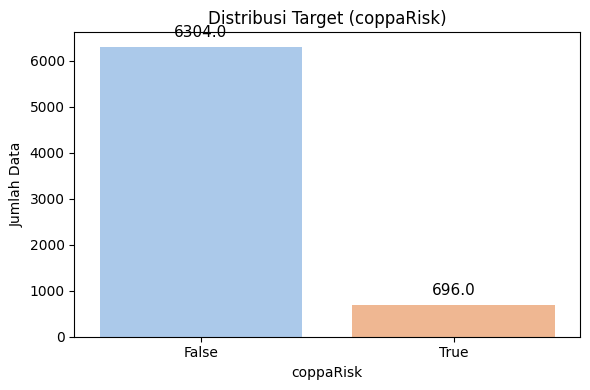

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='coppaRisk', data=df, palette='pastel')

# Tambahkan label jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

# Judul dan label
plt.title('Distribusi Target (coppaRisk)')
plt.xlabel('coppaRisk')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()

Berdasarkan output di atas, terlihat bahwa dataset yang dimiliki termasuk imbalance data.

#### **4.3.2. Analisis Distribusi dan Korelasi Sebelum Penyesuaian Kategori dan Imputasi Missing Value**

##### **4.3.2.1. Analisis Distribusi Fitur Numerik**

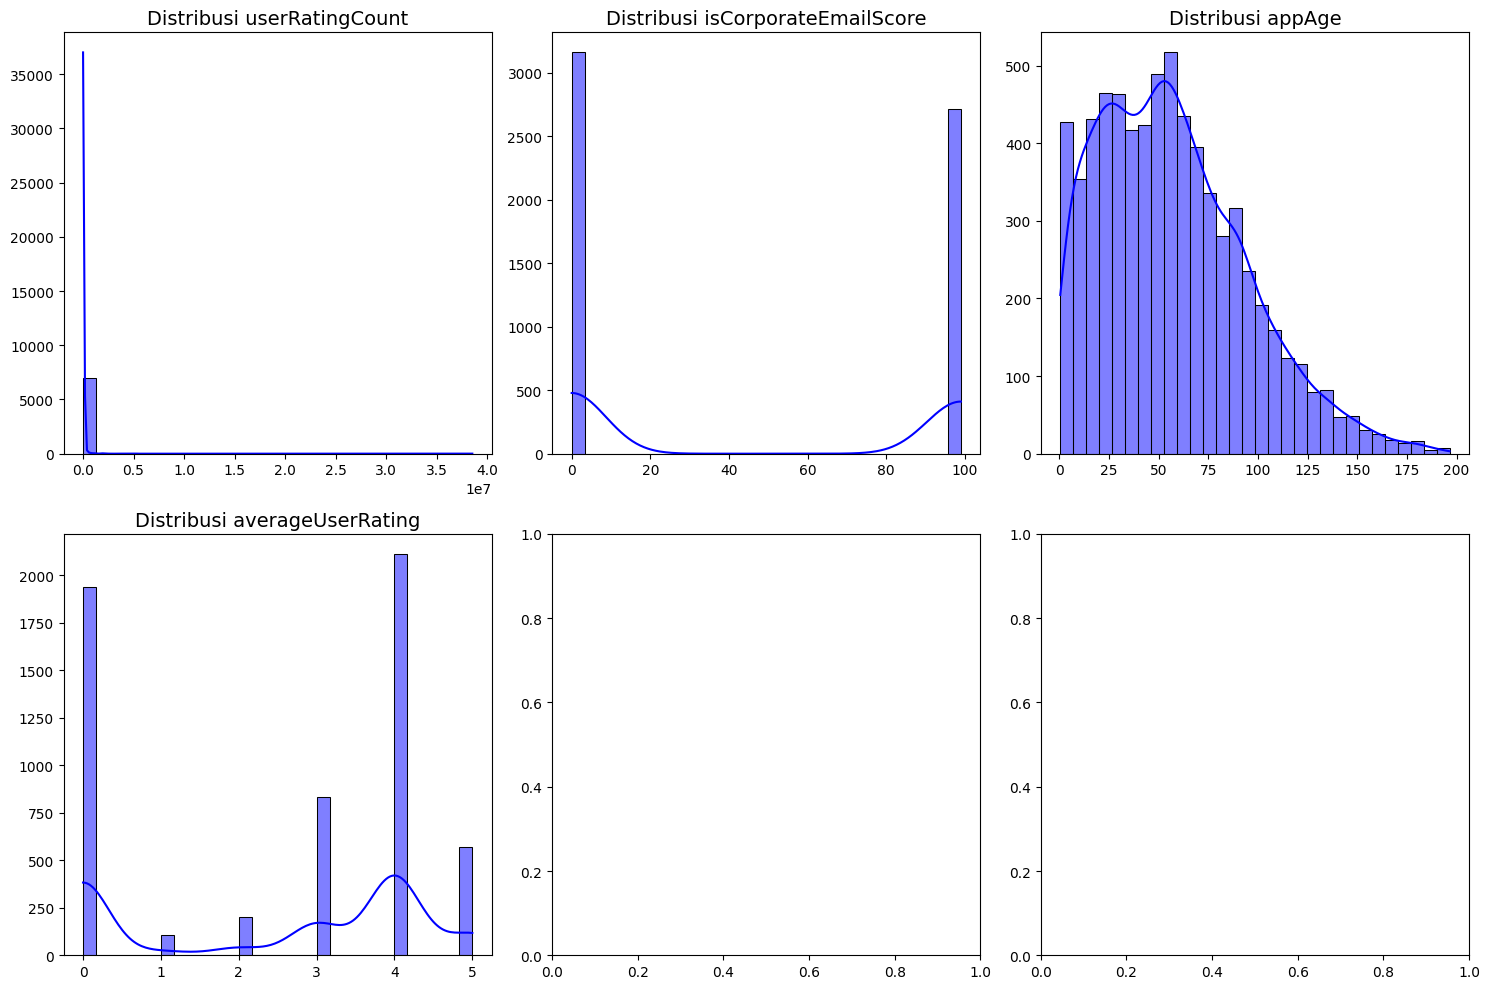

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
num_cols = len(df_numeric.columns)

fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=min(3, num_cols), figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

##### **4.3.2.2. Analisis Korelasi Linier Fitur Numerik**

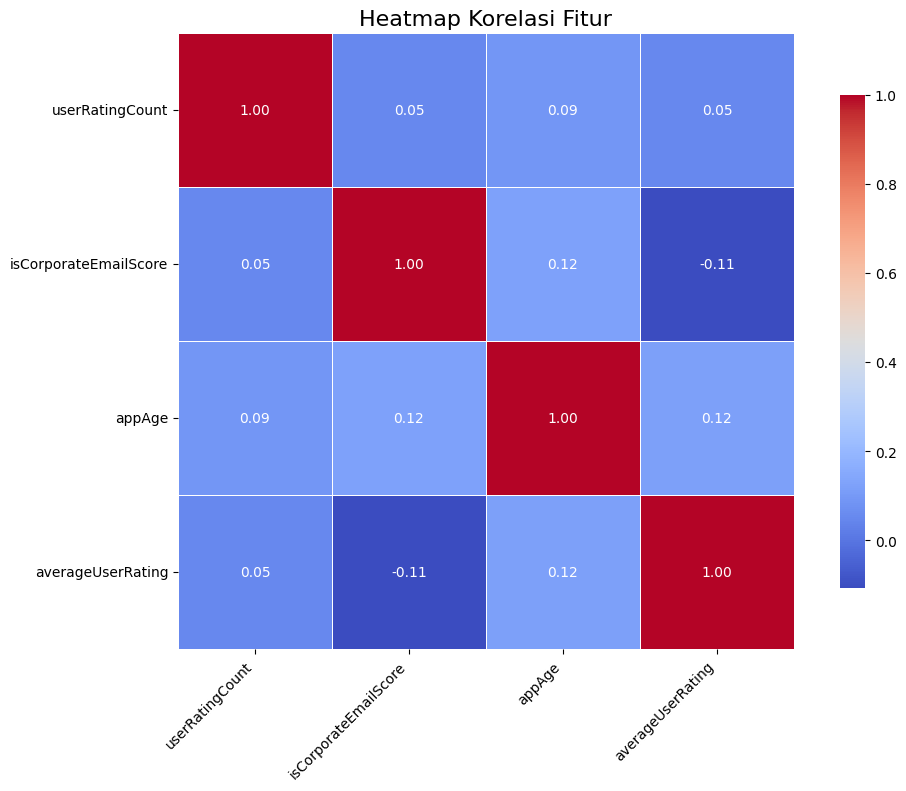

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi Fitur', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##### **4.3.2.3. Analisis Distribusi Fitur Kategorik Berdasarkan Nilai Fitur Target**

Fitur `countryCode`

In [ ]:
countryCode_distribution = pd.crosstab(df['countryCode'], df['coppaRisk'])
countryCode_distribution['Total'] = countryCode_distribution.sum(axis=1)
countryCode_distribution['True Ratio'] = (countryCode_distribution[True] / countryCode_distribution['Total']) * 100
countryCode_distribution = countryCode_distribution.sort_values(by='Total', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(countryCode_distribution)

coppaRisk,False,True,Total,True Ratio
countryCode,,,,
GLOBAL,5359,443,5802,7.635298
US,67,7,74,9.459459
EMEA,58,15,73,20.547945
APAC,52,12,64,18.750000
LATAM,35,10,45,22.222222
RU,31,10,41,24.390244
ID,32,6,38,15.789474
PH,25,3,28,10.714286
FR,18,9,27,33.333333


Pembuatan visualisasi distribusi fitur `countryCode` berdasarkan true ratio terhadap variabel target sebagai landasan untuk menyderhanakan kategori pada fitur `countryCode` tersebut.

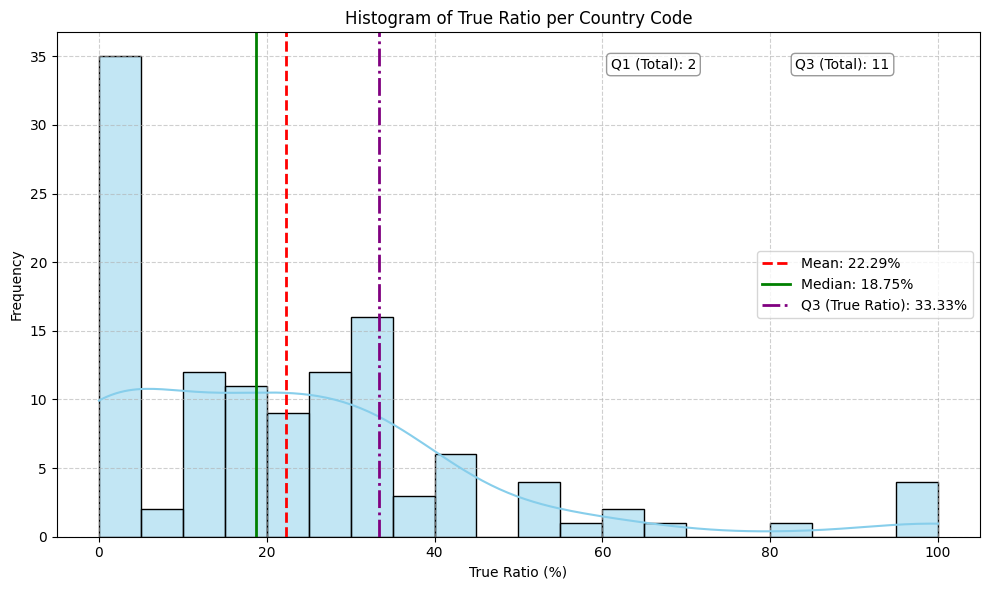

In [ ]:
# Hitung mean dan median
true_ratio_mean = countryCode_distribution['True Ratio'].mean()
true_ratio_median = countryCode_distribution['True Ratio'].median()
true_ratio_q3 = countryCode_distribution['True Ratio'].quantile(0.75)
total_q3 = countryCode_distribution['Total'].quantile(0.75)
total_q1 = countryCode_distribution['Total'].quantile(0.25)

# Plot histogram True Ratio
plt.figure(figsize=(10, 6))
sns.histplot(countryCode_distribution['True Ratio'], bins=20, kde=True, color='skyblue')

# Garis vertikal
plt.axvline(true_ratio_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {true_ratio_mean:.2f}%')
plt.axvline(true_ratio_median, color='green', linestyle='-', linewidth=2, label=f'Median: {true_ratio_median:.2f}%')
plt.axvline(true_ratio_q3, color='purple', linestyle='-.', linewidth=2, label=f'Q3 (True Ratio): {true_ratio_q3:.2f}%')

# Teks berdampingan Q1 dan Q3 Total di kanan atas
plt.text(
    0.60, 0.95,
    f'Q1 (Total): {total_q1:.0f}',
    transform=plt.gca().transAxes,
    ha='left',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8)
)

plt.text(
    0.80, 0.95,
    f'Q3 (Total): {total_q3:.0f}',
    transform=plt.gca().transAxes,
    ha='left',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8)
)

# Styling plot
plt.title('Histogram of True Ratio per Country Code')
plt.xlabel('True Ratio (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui cutoff/rules penyederhanaan kategori adalah sebagai berikut:

if true_ratio > 33.33 and total > 11:
- high_risk_country

else if total < 2:
- rare_country

else:
- low_risk_country

Fitur `primaryGenreName`

In [ ]:
primaryGenreName_distribution = pd.crosstab(df['primaryGenreName'], df['coppaRisk'])
primaryGenreName_distribution['Total'] = primaryGenreName_distribution.sum(axis=1)
primaryGenreName_distribution['True Ratio'] = (primaryGenreName_distribution[True] / primaryGenreName_distribution['Total']) * 100
primaryGenreName_distribution = primaryGenreName_distribution.sort_values(by='Total', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(primaryGenreName_distribution)

coppaRisk,False,True,Total,True Ratio
primaryGenreName,,,,
Games,1399,429,1828,23.468271
Education,312,188,500,37.600000
Entertainment,382,49,431,11.368910
Business,423,0,423,0.000000
Lifestyle,339,1,340,0.294118
Tools,307,1,308,0.324675
Music & Audio,280,0,280,0.000000
Food & Drink,278,1,279,0.358423
Shopping,268,0,268,0.000000


Pembuatan visualisasi distribusi fitur `primaryGenreName` berdasarkan true ratio terhadap variabel target sebagai landasan untuk menyderhanakan kategori pada fitur `primaryGenreName` tersebut.

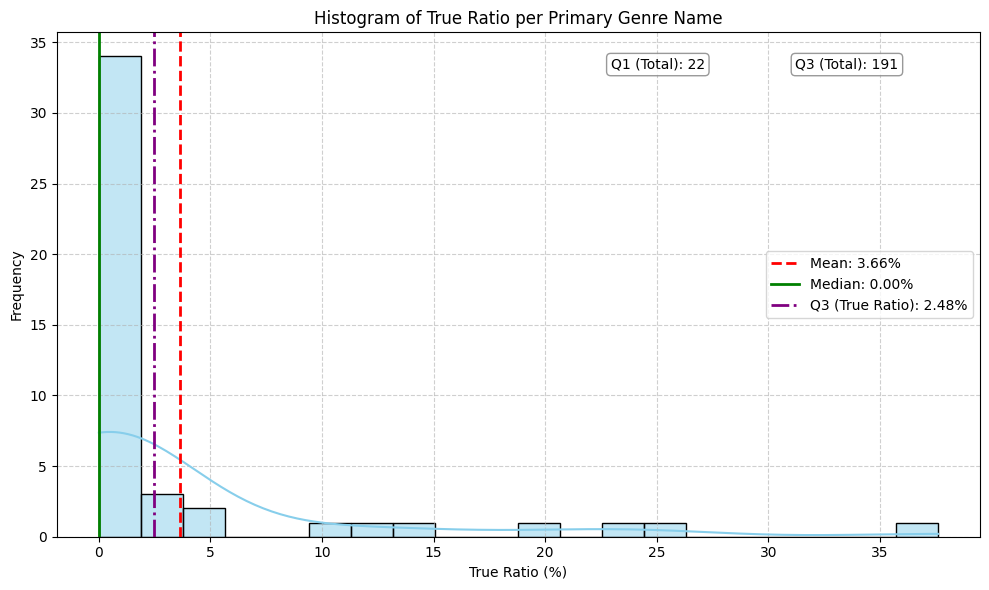

In [ ]:
# Hitung mean dan median
true_ratio_mean = primaryGenreName_distribution['True Ratio'].mean()
true_ratio_median = primaryGenreName_distribution['True Ratio'].median()
true_ratio_q3 = primaryGenreName_distribution['True Ratio'].quantile(0.75)
total_q3 = primaryGenreName_distribution['Total'].quantile(0.75)
total_q1 = primaryGenreName_distribution['Total'].quantile(0.25)

# Plot histogram True Ratio
plt.figure(figsize=(10, 6))
sns.histplot(primaryGenreName_distribution['True Ratio'], bins=20, kde=True, color='skyblue')

# Garis vertikal
plt.axvline(true_ratio_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {true_ratio_mean:.2f}%')
plt.axvline(true_ratio_median, color='green', linestyle='-', linewidth=2, label=f'Median: {true_ratio_median:.2f}%')
plt.axvline(true_ratio_q3, color='purple', linestyle='-.', linewidth=2, label=f'Q3 (True Ratio): {true_ratio_q3:.2f}%')

# Teks berdampingan Q1 dan Q3 Total di kanan atas
plt.text(
    0.60, 0.95,
    f'Q1 (Total): {total_q1:.0f}',
    transform=plt.gca().transAxes,
    ha='left',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8)
)

plt.text(
    0.80, 0.95,
    f'Q3 (Total): {total_q3:.0f}',
    transform=plt.gca().transAxes,
    ha='left',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8)
)

# Styling plot
plt.title('Histogram of True Ratio per Primary Genre Name')
plt.xlabel('True Ratio (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui cutoff/rules penyederhanaan kategori adalah sebagai berikut:

if true_ratio > 2.48 and total > 191:
- high_risk_genre

else if total < 22:
- rare_genre

else:
- low_risk_genre

Berikutnya dilakukan visualisasi distribusi untuk fitur-fitur kategorikal dengan jumlah kategori yang rleatif lebih sedikit sebagai berikut:

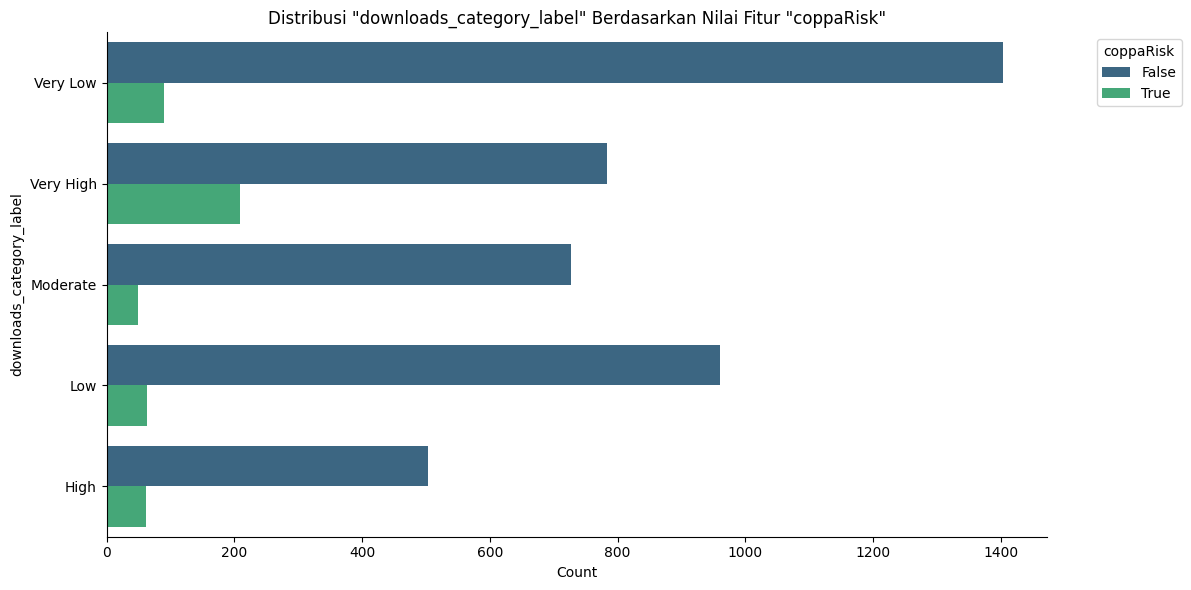

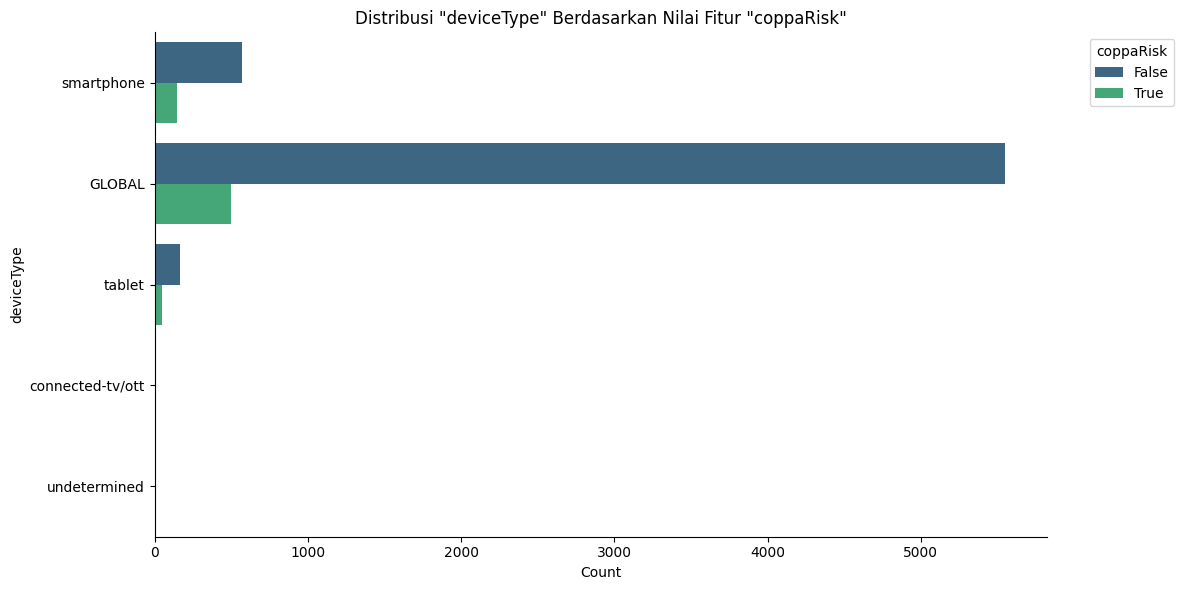

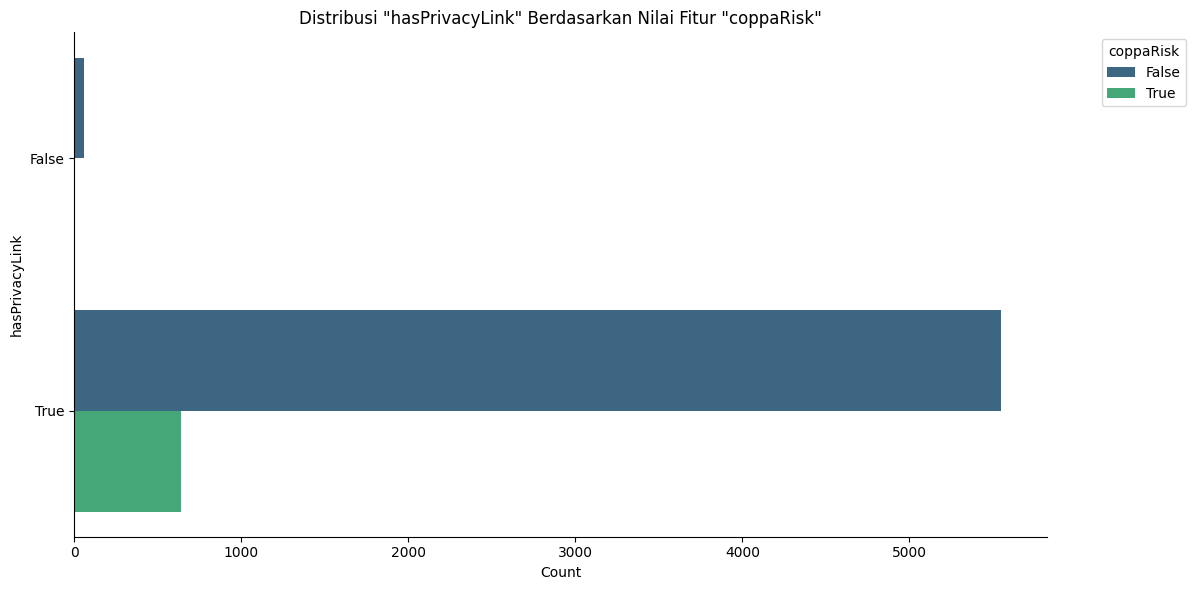

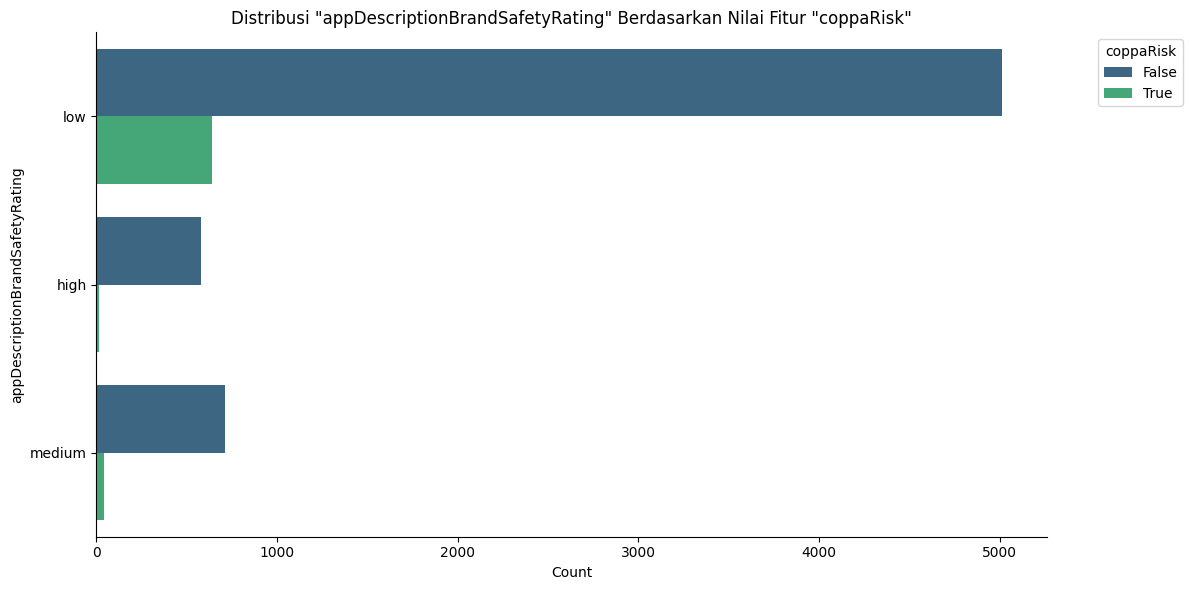

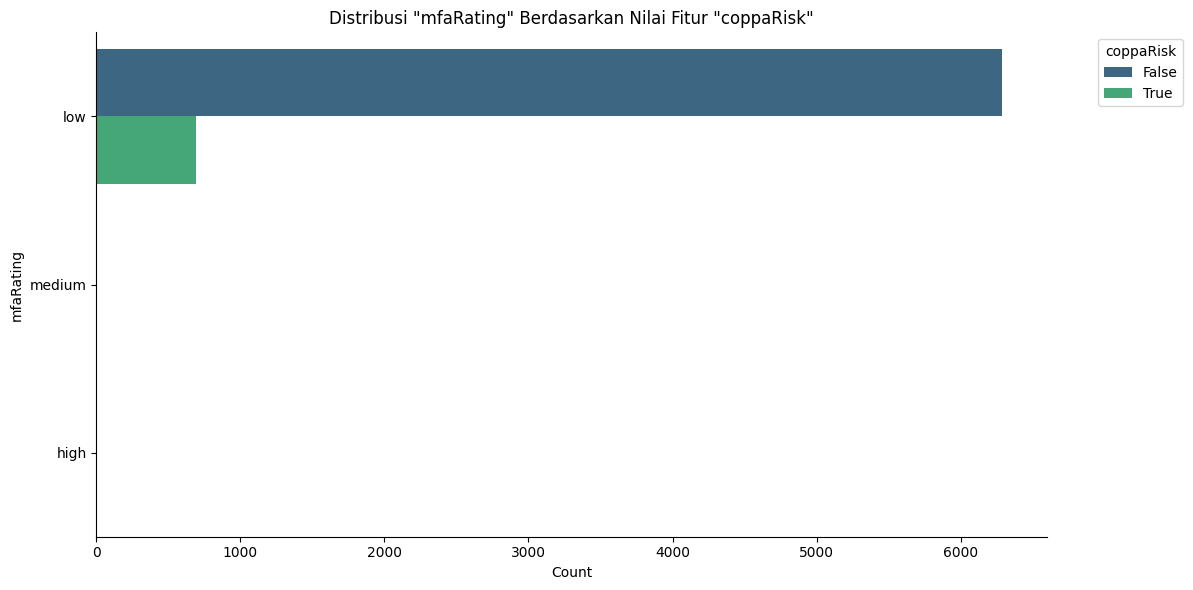

In [ ]:
columns_to_plot = [
    'downloads_category_label',
    'deviceType',
    'hasPrivacyLink',
    'appDescriptionBrandSafetyRating',
    'mfaRating'
]

# Loop untuk membuat countplot untuk masing-masing kolom
for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=col, hue='coppaRisk', data=df, palette='viridis')

    plt.title(f'Distribusi "{col}" Berdasarkan Nilai Fitur "coppaRisk"')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='coppaRisk', loc='upper right', bbox_to_anchor=(1.15, 1))

    # Styling tambahan
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    plt.tight_layout()
    plt.show()

- Pada fitur `downloads_category_label`, kategori moderate, low, dan high, bisa digabung menjadi satu kategori saja (misalnya "mid").
- Pada fitur `deviceType`, kategori smartphone dan tablet bisa digabung menjadi mobile, sedangkan kategori connected-tv/ott dan undetermined bisa digabung menjadi others.

#### **4.3.3. Penyesuaian Kategori**

Fitur `countryCode`

Impelementasi penyesuaian atau penyederhanaan kategori pada fitur `countryCode` adalah sebagai berikut:

In [ ]:
def categorize_country(row):
    if row['True Ratio'] > 33.33 and row['Total'] > 11:
        return 'high_risk_country'
    elif row['Total'] < 2:
        return 'rare_country'
    else:
        return 'low_risk_country'

# Terapkan fungsi ke setiap baris
countryCode_distribution['country_category'] = countryCode_distribution.apply(categorize_country, axis=1)

# Gabungkan 'country_category' dari countryCode_distribution ke df utama
df = df.merge(
    countryCode_distribution['country_category'],
    left_on='countryCode',
    right_index=True,
    how='left'
)

# Hapus kolom 'countryCode'
df.drop(columns=['countryCode'], inplace=True)

# Pindahkan kolom 'coppaRisk' ke posisi paling akhir
coppa_col = df.pop('coppaRisk')
df['coppaRisk'] = coppa_col

# Cek hasil
df.head()

,userRatingCount,primaryGenreName,downloads_category_label,deviceType,hasPrivacyLink,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,country_category,coppaRisk
0,127731,Sports,NaN,smartphone,True,99.0,160.400000,4.0,low,low,low_risk_country,False
1,0,Medical,Very Low,GLOBAL,True,99.0,17.500000,0.0,low,low,low_risk_country,False
2,51143,Games,Very High,GLOBAL,True,0.0,30.766667,4.0,low,low,low_risk_country,False
3,1074,Games,NaN,GLOBAL,True,99.0,71.533333,4.0,low,low,low_risk_country,False
4,17,Tools,Moderate,GLOBAL,True,99.0,52.400000,4.0,low,low,low_risk_country,False


Fitur `primaryGenreName`

Impelementasi penyesuaian atau penyederhanaan kategori pada fitur `primaryGenreName` adalah sebagai berikut:

In [ ]:
def categorize_genre(row):
    if row['True Ratio'] > 2.48 and row['Total'] > 191:
        return 'high_risk_genre'
    elif row['Total'] < 22:
        return 'rare_genre'
    else:
        return 'low_risk_genre'

# Terapkan fungsi ke setiap baris
primaryGenreName_distribution['genre_category'] = primaryGenreName_distribution.apply(categorize_genre, axis=1)

# Gabungkan 'genre_category' dari primaryGenreName_distribution ke df utama
df = df.merge(
    primaryGenreName_distribution['genre_category'],
    left_on='primaryGenreName',
    right_index=True,
    how='left'
)

# Hapus kolom 'primaryGenreName'
df.drop(columns=['primaryGenreName'], inplace=True)

# Pindahkan kolom 'coppaRisk' ke posisi paling akhir
coppa_col = df.pop('coppaRisk')
df['coppaRisk'] = coppa_col

# Cek hasil
df.head()

,userRatingCount,downloads_category_label,deviceType,hasPrivacyLink,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,country_category,genre_category,coppaRisk
0,127731,NaN,smartphone,True,99.0,160.400000,4.0,low,low,low_risk_country,low_risk_genre,False
1,0,Very Low,GLOBAL,True,99.0,17.500000,0.0,low,low,low_risk_country,low_risk_genre,False
2,51143,Very High,GLOBAL,True,0.0,30.766667,4.0,low,low,low_risk_country,high_risk_genre,False
3,1074,NaN,GLOBAL,True,99.0,71.533333,4.0,low,low,low_risk_country,high_risk_genre,False
4,17,Moderate,GLOBAL,True,99.0,52.400000,4.0,low,low,low_risk_country,low_risk_genre,False


Fitur `downloads_category_label`

Impelementasi penyesuaian atau penyederhanaan kategori pada fitur `downloads_category_label` adalah sebagai berikut:

In [ ]:
df['downloads_category_label'] = df['downloads_category_label'].replace({
    'Moderate': 'mid',
    'Low': 'mid',
    'High': 'mid'
})

Fitur `deviceType`

Impelementasi penyesuaian atau penyederhanaan kategori pada fitur `deviceType` adalah sebagai berikut:

In [ ]:
df['deviceType'] = df['deviceType'].replace({
    'smartphone': 'mobile',
    'tablet': 'mobile',
    'connected-tv/ott': 'others',
    'undetermined': 'others'
})

#### **4.3.4. Analisis Distribusi Setelah Penyesuaian Kategori dan Sebelum Imputasi Missing Value**

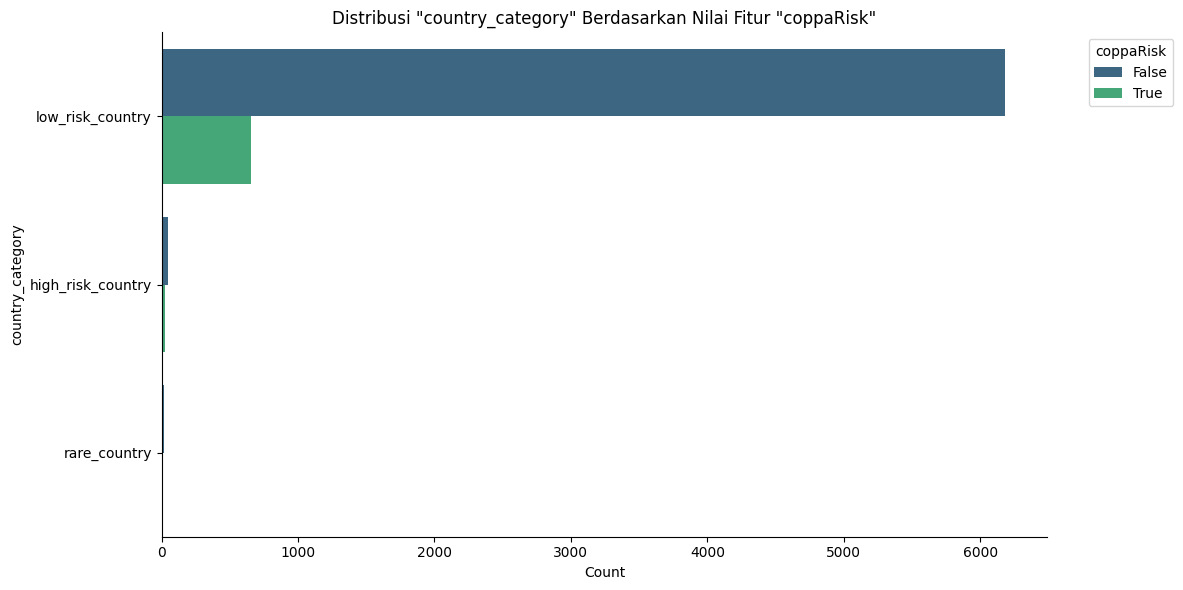

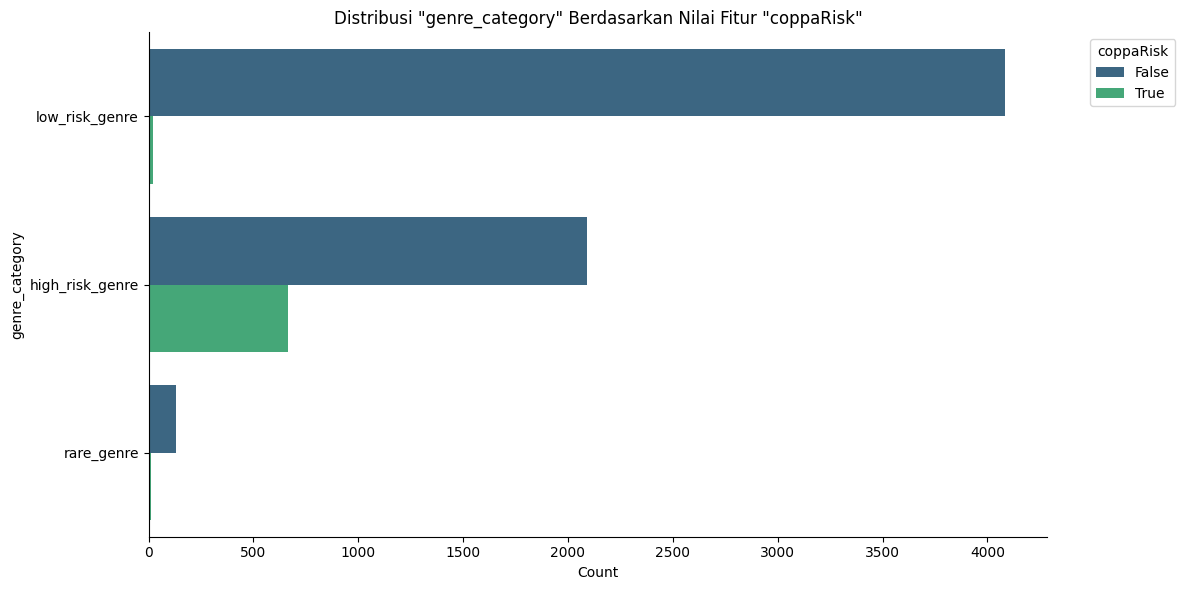

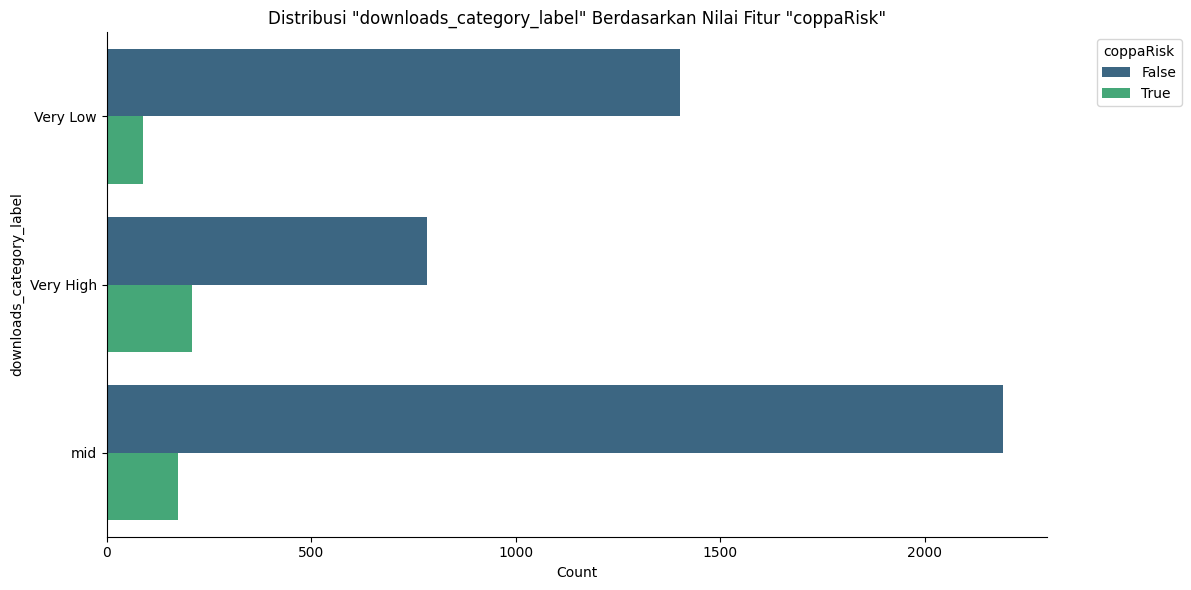

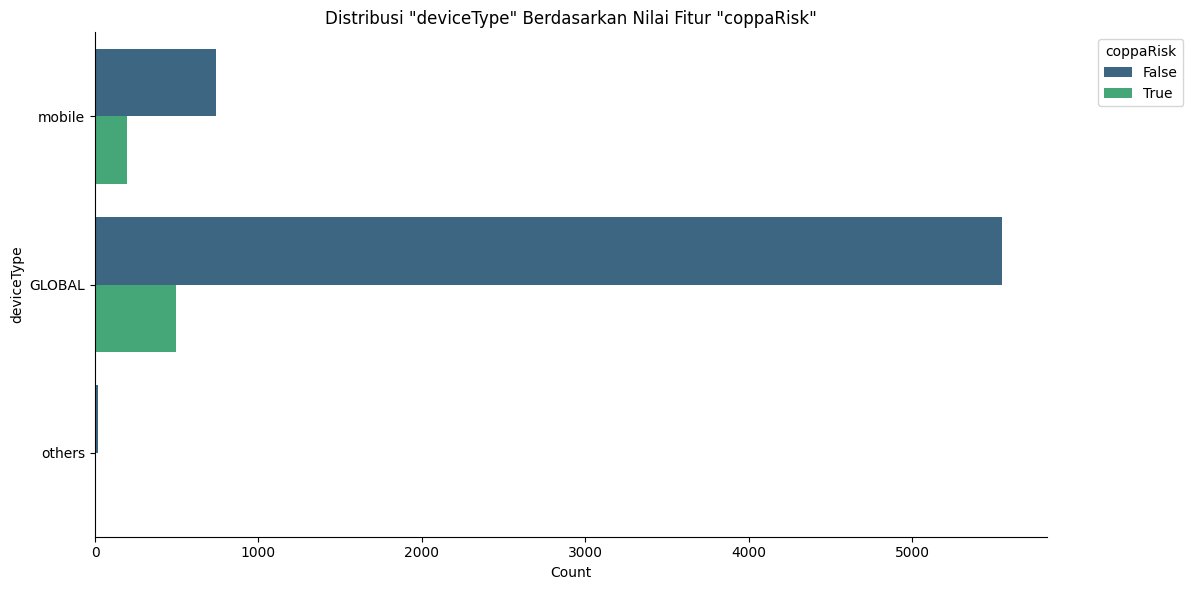

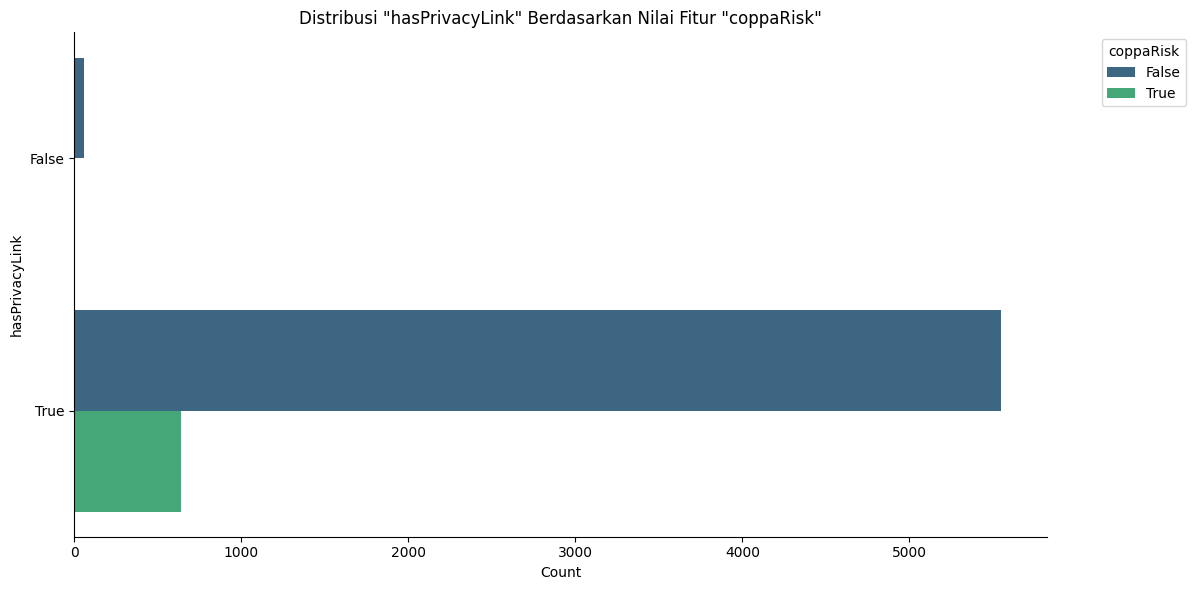

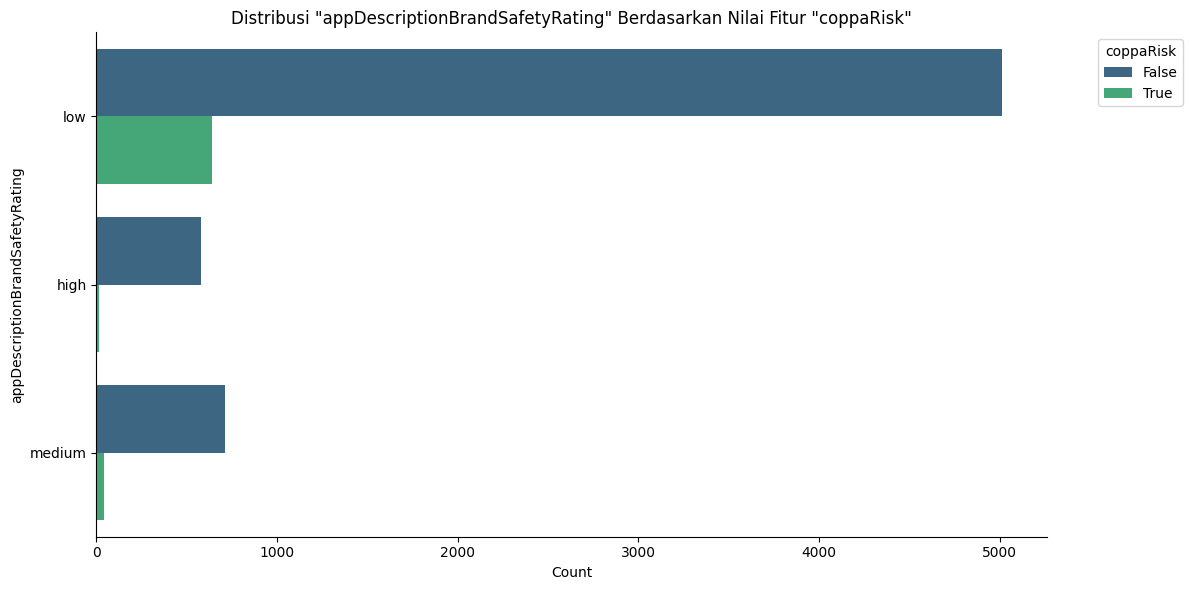

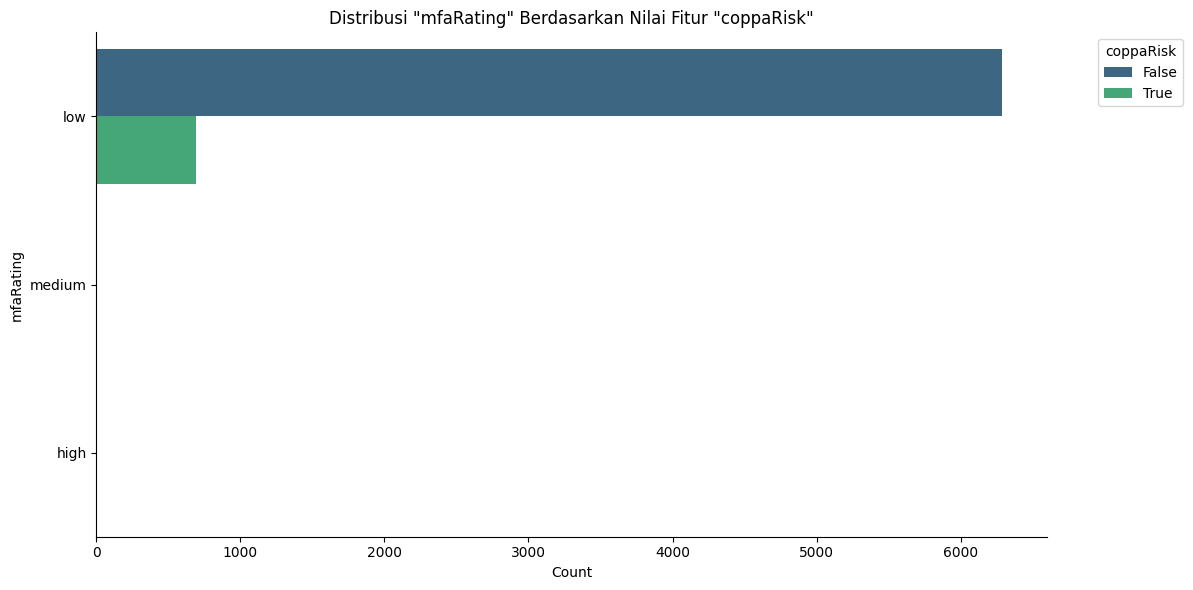

In [ ]:
columns_to_plot = [
    'country_category',
    'genre_category',
    'downloads_category_label',
    'deviceType',
    'hasPrivacyLink',
    'appDescriptionBrandSafetyRating',
    'mfaRating'
]

# Loop untuk membuat countplot untuk masing-masing kolom
for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=col, hue='coppaRisk', data=df, palette='viridis')

    plt.title(f'Distribusi "{col}" Berdasarkan Nilai Fitur "coppaRisk"')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='coppaRisk', loc='upper right', bbox_to_anchor=(1.15, 1))

    # Styling tambahan
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    plt.tight_layout()
    plt.show()

#### **4.3.5. Handle dan Imputasi Missing Value**

Menghapus obervasi yang missing pada fitur `country_category` karena jumlah missingnya yang relatif sedikit (kurang dari 1%) jika ditinjau dari dataset secara keseluruhan.

In [ ]:
df = df.dropna(subset=['country_category'])
df.shape

(6936, 12)

##### **4.3.5.1. Splitting Data Menjadi Training dan Validation Set**

Proses splitting data dilakukan secara stratified untuk memastikan keterwakilan tiap-tiap kelas pada training set dan testing set karena data yang dimiliki termasuk imbalance data.

In [ ]:
X = df.drop('coppaRisk', axis=1)
y = df['coppaRisk']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("y_train class distribution:")
print(y_train.value_counts(normalize=True))


print("\ny_val class distribution:")
print(y_val.value_counts(normalize=True))

y_train class distribution:
coppaRisk
False    0.900536
True     0.099464
Name: proportion, dtype: float64

y_val class distribution:
coppaRisk
False    0.900714
True     0.099286
Name: proportion, dtype: float64


Menampilkan dataset sebelum imputasi sebagai bahan untuk melakukan pencocokan.

In [ ]:
X_train

,userRatingCount,downloads_category_label,deviceType,hasPrivacyLink,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,country_category,genre_category
609,10994,Very High,GLOBAL,True,0.0,63.866667,4.0,low,low,low_risk_country,high_risk_genre
4050,30341,NaN,mobile,True,99.0,48.233333,4.0,medium,low,low_risk_country,high_risk_genre
125,8,mid,GLOBAL,True,0.0,42.833333,4.0,low,low,low_risk_country,low_risk_genre
5123,0,NaN,GLOBAL,True,NaN,59.166667,0.0,low,low,low_risk_country,low_risk_genre
1923,55705,NaN,mobile,True,99.0,44.766667,4.0,medium,low,high_risk_country,high_risk_genre
...,...,...,...,...,...,...,...,...,...,...,...
5520,18,Very Low,GLOBAL,True,0.0,53.366667,5.0,low,low,low_risk_country,low_risk_genre
4656,0,Very Low,GLOBAL,True,99.0,27.666667,NaN,low,low,low_risk_country,low_risk_genre
2049,0,mid,GLOBAL,True,0.0,12.333333,0.0,low,low,low_risk_country,low_risk_genre
174,68,NaN,GLOBAL,True,NaN,44.866667,4.0,low,low,low_risk_country,high_risk_genre


In [ ]:
X_val

,userRatingCount,downloads_category_label,deviceType,hasPrivacyLink,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,country_category,genre_category
4771,0,Very Low,GLOBAL,NaN,0.0,64.166667,NaN,low,low,low_risk_country,high_risk_genre
991,7,mid,GLOBAL,True,0.0,34.233333,4.0,low,low,low_risk_country,low_risk_genre
1349,0,mid,GLOBAL,True,0.0,23.166667,0.0,low,low,low_risk_country,high_risk_genre
4085,1,NaN,GLOBAL,True,NaN,22.066667,1.0,medium,low,low_risk_country,high_risk_genre
6979,0,mid,GLOBAL,True,0.0,36.833333,NaN,medium,low,low_risk_country,low_risk_genre
...,...,...,...,...,...,...,...,...,...,...,...
449,15,NaN,GLOBAL,True,NaN,93.733333,4.0,low,low,low_risk_country,low_risk_genre
221,6219,NaN,GLOBAL,True,99.0,35.966667,4.0,high,low,low_risk_country,high_risk_genre
4284,94,mid,mobile,True,0.0,29.766667,4.0,low,low,low_risk_country,high_risk_genre
1389,0,Very Low,GLOBAL,True,99.0,63.166667,NaN,low,low,low_risk_country,low_risk_genre


Transformasi nilai fitur `hasPrivacyLink` ke numerik sebelum imputasi missing value.

In [ ]:
X_train['hasPrivacyLink'] = X_train['hasPrivacyLink'].replace({True: 1, False: 0})
X_train['hasPrivacyLink']

<ipython-input-38-22f8740453ea>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['hasPrivacyLink'] = X_train['hasPrivacyLink'].replace({True: 1, False: 0})


,hasPrivacyLink
609,1.0
4050,1.0
125,1.0
5123,1.0
1923,1.0
...,...
5520,1.0
4656,1.0
2049,1.0
174,1.0


In [ ]:
X_val['hasPrivacyLink'] = X_val['hasPrivacyLink'].replace({True: 1, False: 0})
X_val['hasPrivacyLink']

<ipython-input-39-1f10ea447e61>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val['hasPrivacyLink'] = X_val['hasPrivacyLink'].replace({True: 1, False: 0})


,hasPrivacyLink
4771,NaN
991,1.0
1349,1.0
4085,1.0
6979,1.0
...,...
449,1.0
221,1.0
4284,1.0
1389,1.0


##### **4.3.5.2. Imputasi Missing Value**

Encoding fitur kategorikal untuk kebutuhan imputasi missing value, kemudian menerapkan iterative imputer untuk mengisi missing value pada X_train dan X_val.

In [ ]:
nominal_cols = ['country_category', 'genre_category', 'deviceType']
ordinal_cols = ['downloads_category_label', 'appDescriptionBrandSafetyRating', 'mfaRating']
numeric_cols = ['userRatingCount', 'isCorporateEmailScore', 'appAge', 'averageUserRating', 'hasPrivacyLink']

# STEP 1: Proses ORDINAL
def encode_ordinal(df, fit=True, encoder=None):
    df_ordinal = df[ordinal_cols].fillna('missing')
    if fit:
        downloads_category_label_order = ['missing', 'Very Low', 'mid', 'Very High']
        appDescriptionSafetyRating_order = ['low', 'medium', 'high']
        mfaRating_order = ['low', 'medium', 'high']
        encoder = OrdinalEncoder(categories=[
            downloads_category_label_order,
            appDescriptionSafetyRating_order,
            mfaRating_order
        ])
        X_ordinal = encoder.fit_transform(df_ordinal)
    else:
        X_ordinal = encoder.transform(df_ordinal)

    # Ubah 'missing' (kode 0) ke np.nan hanya untuk kolom pertama
    X_ordinal[:, 0] = np.where(X_ordinal[:, 0] == 0, np.nan, X_ordinal[:, 0])

    return X_ordinal, encoder

# STEP 2: Proses NOMINAL
def encode_nominal(df, fit=True, encoder=None):
    df_nominal = df[nominal_cols].fillna('missing')
    if fit:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_nominal = encoder.fit_transform(df_nominal)
    else:
        X_nominal = encoder.transform(df_nominal)
    return X_nominal, encoder

# STEP 3: Gabungkan semua & imputasi
def prepare_for_imputation(df, fit_encoders=False, onehot_enc=None, ordinal_enc=None):
    X_nominal, onehot_enc = encode_nominal(df, fit_encoders, onehot_enc)
    X_ordinal, ordinal_enc = encode_ordinal(df, fit_encoders, ordinal_enc)
    X_numeric = df[numeric_cols].values
    return np.concatenate([X_nominal, X_ordinal, X_numeric], axis=1), onehot_enc, ordinal_enc

# Proses X_train
X_all_train, onehot_enc, ordinal_enc = prepare_for_imputation(X_train, fit_encoders=True)

# Imputer hanya di-fit di training set
imputer = IterativeImputer(max_iter=10, initial_strategy='median', random_state=42)
X_imputed_train = imputer.fit_transform(X_all_train)

# Proses X_val (gunakan encoder dan imputer hasil fit dari training)
X_all_val, _, _ = prepare_for_imputation(X_val, fit_encoders=False, onehot_enc=onehot_enc, ordinal_enc=ordinal_enc)
X_imputed_val = imputer.transform(X_all_val)

# STEP 4: Inverse transform hasil imputasi
def inverse_transform_imputed(X_imputed, onehot_enc, ordinal_enc):
    n_onehot = onehot_enc.transform(X_train[nominal_cols]).shape[1]
    n_ordinal = len(ordinal_cols)

    X_nominal_imp = X_imputed[:, :n_onehot]
    X_ordinal_imp = X_imputed[:, n_onehot:n_onehot + n_ordinal]
    X_numeric_imp = X_imputed[:, n_onehot + n_ordinal:]

    # One-hot inverse
    X_nominal_binary = (X_nominal_imp == X_nominal_imp.max(axis=1, keepdims=True)).astype(int)
    X_nominal_decoded = onehot_enc.inverse_transform(X_nominal_binary)

    # Ordinal inverse
    X_ordinal_rounded = np.round(X_ordinal_imp).astype(int)
    max_values = [len(cat) - 1 for cat in ordinal_enc.categories_]
    X_ordinal_rounded = np.clip(X_ordinal_rounded, 0, max_values)
    X_ordinal_decoded = ordinal_enc.inverse_transform(X_ordinal_rounded)

    return pd.DataFrame(X_nominal_decoded, columns=nominal_cols), \
           pd.DataFrame(X_ordinal_decoded, columns=ordinal_cols), \
           pd.DataFrame(X_numeric_imp, columns=numeric_cols)

# Rekonstruksi df hasil imputasi
df_train_nom, df_train_ord, df_train_num = inverse_transform_imputed(X_imputed_train, onehot_enc, ordinal_enc)
df_val_nom, df_val_ord, df_val_num = inverse_transform_imputed(X_imputed_val, onehot_enc, ordinal_enc)

df_train_imputed = pd.concat([df_train_nom, df_train_ord, df_train_num], axis=1)
df_val_imputed = pd.concat([df_val_nom, df_val_ord, df_val_num], axis=1)

Mengecek dataset hasil imputasi.

In [ ]:
df_train_imputed

,country_category,genre_category,deviceType,downloads_category_label,appDescriptionBrandSafetyRating,mfaRating,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,hasPrivacyLink
0,low_risk_country,high_risk_genre,GLOBAL,Very High,low,low,10994.0,0.000000,63.866667,4.000000,1.000000
1,low_risk_country,high_risk_genre,mobile,Very High,medium,low,30341.0,99.000000,48.233333,4.000000,1.000000
2,low_risk_country,low_risk_genre,GLOBAL,mid,low,low,8.0,0.000000,42.833333,4.000000,1.000000
3,low_risk_country,low_risk_genre,GLOBAL,Very Low,low,low,0.0,59.645821,59.166667,0.000000,1.000000
4,high_risk_country,high_risk_genre,mobile,Very High,medium,low,55705.0,99.000000,44.766667,4.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5595,low_risk_country,low_risk_genre,GLOBAL,Very Low,low,low,18.0,0.000000,53.366667,5.000000,1.000000
5596,low_risk_country,low_risk_genre,GLOBAL,Very Low,low,low,0.0,99.000000,27.666667,0.814472,1.000000
5597,low_risk_country,low_risk_genre,GLOBAL,mid,low,low,0.0,0.000000,12.333333,0.000000,1.000000
5598,low_risk_country,high_risk_genre,GLOBAL,mid,low,low,68.0,31.344753,44.866667,4.000000,1.000000


In [ ]:
df_val_imputed

,country_category,genre_category,deviceType,downloads_category_label,appDescriptionBrandSafetyRating,mfaRating,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,hasPrivacyLink
0,low_risk_country,high_risk_genre,GLOBAL,Very Low,low,low,0.0,0.000000,64.166667,2.119924,0.983255
1,low_risk_country,low_risk_genre,GLOBAL,mid,low,low,7.0,0.000000,34.233333,4.000000,1.000000
2,low_risk_country,high_risk_genre,GLOBAL,mid,low,low,0.0,0.000000,23.166667,0.000000,1.000000
3,low_risk_country,high_risk_genre,GLOBAL,mid,medium,low,1.0,44.698232,22.066667,1.000000,1.000000
4,low_risk_country,low_risk_genre,GLOBAL,mid,medium,low,0.0,0.000000,36.833333,2.290634,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
1395,low_risk_country,low_risk_genre,GLOBAL,mid,low,low,15.0,47.339256,93.733333,4.000000,1.000000
1396,low_risk_country,high_risk_genre,GLOBAL,mid,high,low,6219.0,99.000000,35.966667,4.000000,1.000000
1397,low_risk_country,high_risk_genre,mobile,mid,low,low,94.0,0.000000,29.766667,4.000000,1.000000
1398,low_risk_country,low_risk_genre,GLOBAL,Very Low,low,low,0.0,99.000000,63.166667,1.102582,1.000000


In [ ]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_category                 5600 non-null   object 
 1   genre_category                   5600 non-null   object 
 2   deviceType                       5600 non-null   object 
 3   downloads_category_label         5600 non-null   object 
 4   appDescriptionBrandSafetyRating  5600 non-null   object 
 5   mfaRating                        5600 non-null   object 
 6   userRatingCount                  5600 non-null   float64
 7   isCorporateEmailScore            5600 non-null   float64
 8   appAge                           5600 non-null   float64
 9   averageUserRating                5600 non-null   float64
 10  hasPrivacyLink                   5600 non-null   float64
dtypes: float64(5), object(6)
memory usage: 481.4+ KB


In [ ]:
df_val_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_category                 1400 non-null   object 
 1   genre_category                   1400 non-null   object 
 2   deviceType                       1400 non-null   object 
 3   downloads_category_label         1400 non-null   object 
 4   appDescriptionBrandSafetyRating  1400 non-null   object 
 5   mfaRating                        1400 non-null   object 
 6   userRatingCount                  1400 non-null   float64
 7   isCorporateEmailScore            1400 non-null   float64
 8   appAge                           1400 non-null   float64
 9   averageUserRating                1400 non-null   float64
 10  hasPrivacyLink                   1400 non-null   float64
dtypes: float64(5), object(6)
memory usage: 120.4+ KB


#### **4.3.6. Analisis Distribusi dan Korelasi Setelah Penyesuaian Kategri dan Imputasi Missing Value**

##### **4.3.6.1. Analisis Distirbusi Fitur Numerik**

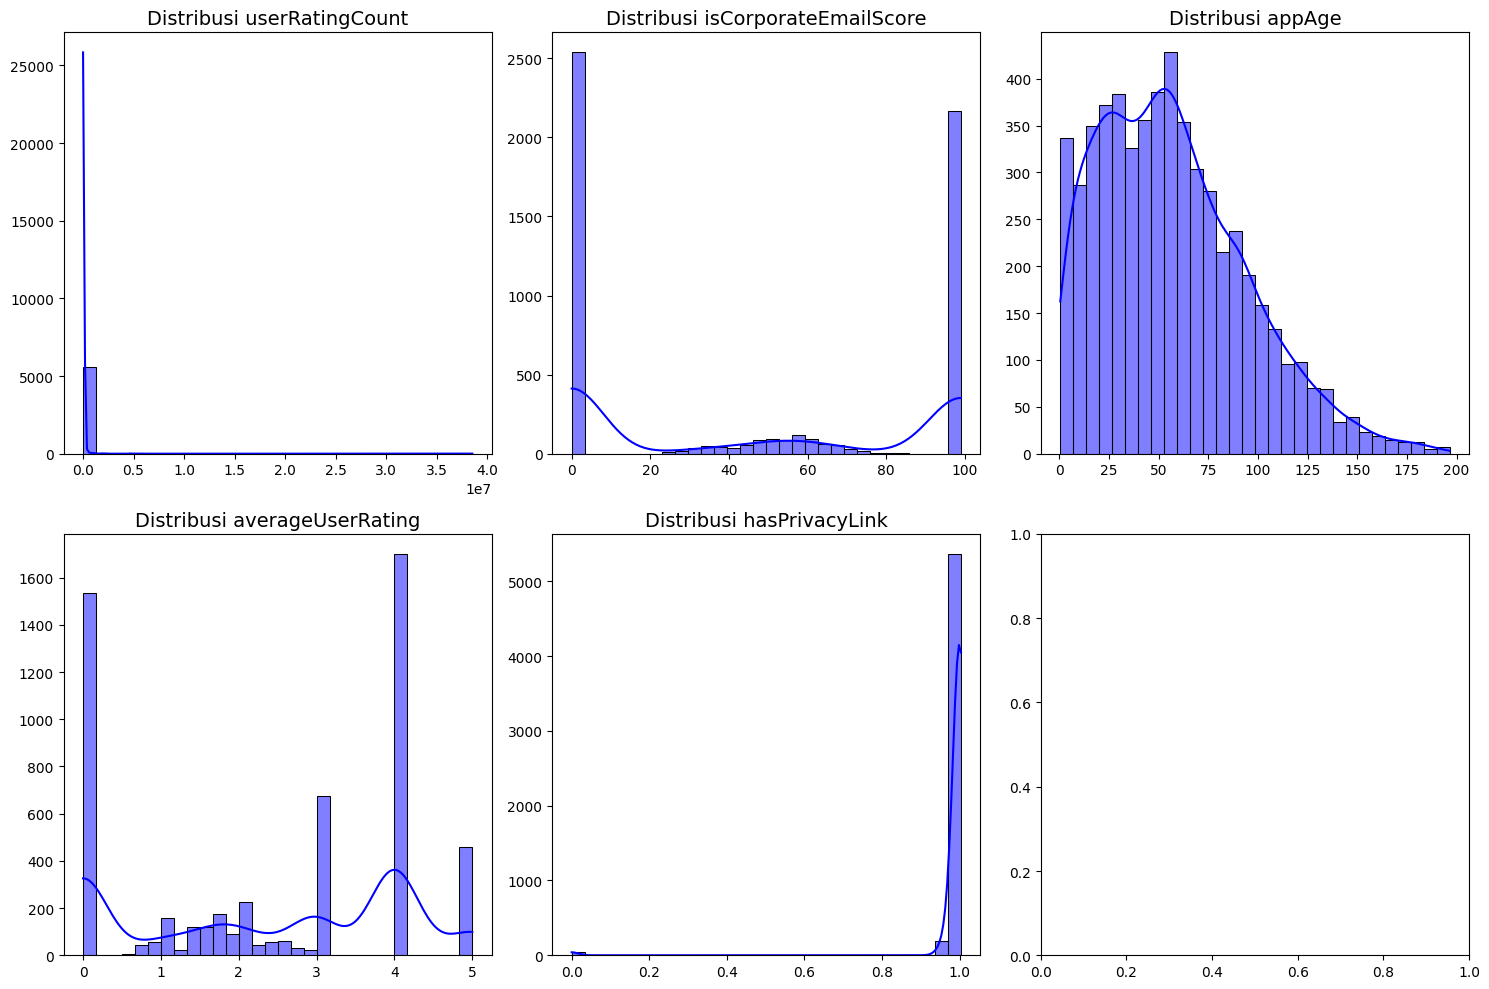

In [ ]:
df_train_imputed_numeric = df_train_imputed.select_dtypes(include=['number'])
num_cols = len(df_train_imputed_numeric.columns)

fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=min(3, num_cols), figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(df_train_imputed_numeric.columns):
    sns.histplot(df_train_imputed_numeric[col], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa distribusi data tidak mengalami perubahan yang signifikan setelah proses imputasi dijalankan.

Pengecekan nilai pada fitur `averageUserRating`.

In [ ]:
df['averageUserRating'].unique()

array([ 4.,  0., nan,  3.,  5.,  1.,  2.])

In [ ]:
df_train_imputed['averageUserRating'].unique()

array([4.        , 0.        , 5.        , 2.67227355, 1.67733874,
       2.60460441, 3.        , 2.        , 1.02602305, 1.52254409,
       2.53160045, 2.09181929, 1.52010835, 1.34208357, 2.38102681,
       1.48440004, 0.75143999, 1.05361662, 1.39133938, 1.70325492,
       2.76749841, 1.0811013 , 2.55903238, 1.        , 2.7740806 ,
       1.41649822, 2.55308083, 2.91466411, 2.78826694, 1.78646779,
       0.86343742, 0.92674031, 2.43588507, 2.43540237, 1.13693838,
       1.60582801, 1.68891708, 2.46110227, 1.87952845, 1.79782984,
       1.43494824, 1.62032572, 0.75603892, 2.3658774 , 3.25957807,
       1.9187546 , 2.66361674, 1.57937271, 2.70203132, 0.92538768,
       2.27903882, 1.6499226 , 1.43245921, 1.48495756, 2.14323518,
       1.76087678, 1.74518632, 2.04157303, 0.78714932, 1.71137067,
       1.69622126, 2.01857839, 1.40270144, 1.64521873, 1.88602105,
       1.7251286 , 2.29608191, 1.66538139, 1.80621613, 0.76902413,
       1.73707056, 0.79147772, 1.49278632, 1.19607451, 1.49684

In [ ]:
df_val_imputed['averageUserRating'].unique()

array([2.1199243 , 4.        , 0.        , 1.        , 2.29063356,
       1.42650765, 5.        , 1.83133713, 1.48629372, 2.0040246 ,
       2.61569595, 1.53850508, 3.        , 2.        , 2.15189198,
       1.94472502, 2.27930934, 2.02885733, 0.97137696, 1.43143141,
       1.42082663, 1.91307357, 1.77827635, 0.83719647, 2.28765778,
       2.82021298, 1.7734311 , 2.11162663, 1.85464013, 1.8359739 ,
       0.99341897, 2.41890034, 1.40722469, 2.46110227, 0.86793917,
       1.32749544, 1.62701739, 1.80470186, 1.72026016, 1.36049951,
       1.8800695 , 1.24271372, 1.31369865, 1.73815165, 1.75276001,
       2.23726598, 1.482198  , 3.00322908, 1.74345428, 1.98413824,
       1.48652539, 2.32672815, 0.8804805 , 1.51415781, 1.3485964 ,
       1.96360692, 2.42079401, 1.41271087, 1.47498597, 2.64328951,
       1.78210154, 1.68096297, 2.55026669, 1.08553859, 2.07051923,
       2.45542124, 1.73328321, 2.07078975, 1.04816828, 1.58233016,
       2.07890449, 0.82502284, 1.45247807, 1.69026971, 1.76980

Nilai pada fitur averageUserRating perlu untuk dibulatkan untuk menjaga konsistensi dengan nilai sebelum imputasi.

In [ ]:
df_train_imputed["averageUserRating"] = df_train_imputed["averageUserRating"].round()
df_train_imputed['averageUserRating'].unique()

array([4., 0., 5., 3., 2., 1.])

In [ ]:
df_val_imputed["averageUserRating"] = df_val_imputed["averageUserRating"].round()
df_val_imputed['averageUserRating'].unique()

array([2., 4., 0., 1., 5., 3.])

##### **4.3.6.2. Analisis Korelasi Linier Fitur Numerik**

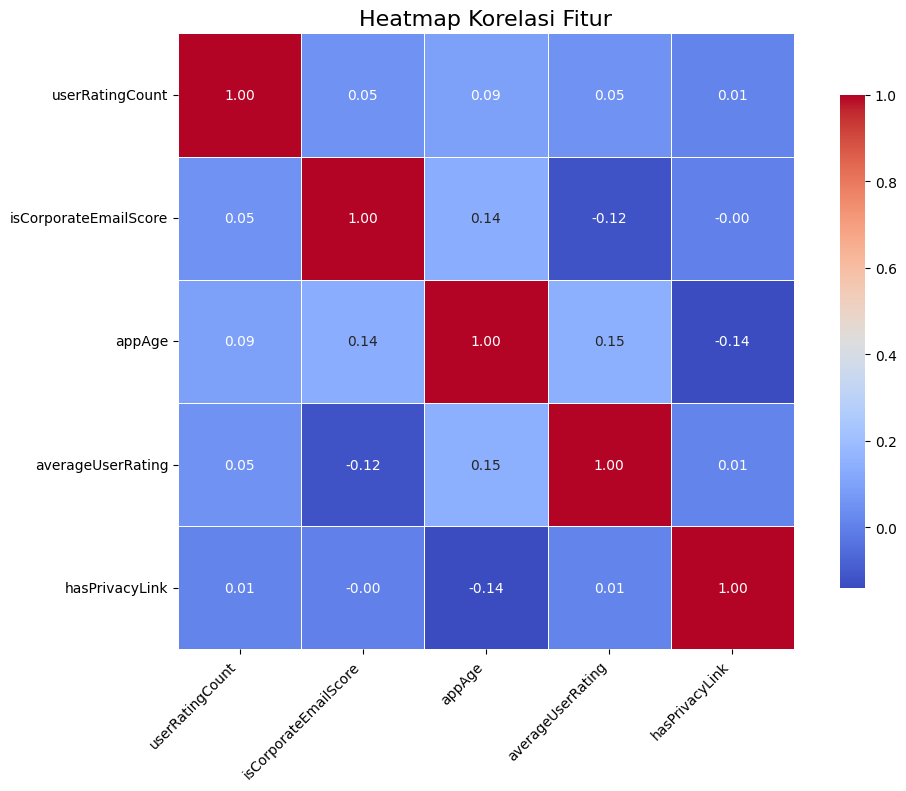

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train_imputed_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi Fitur', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##### **4.3.6.3. Analisis Distribusi Fitur Kategorik Berdasarkan Nilai Fitur Target**

Menggabungkan fitur target ke X_train hasil imputasi untuk kebutuhan visualisasi.

In [ ]:
df_train_imputed['coppaRisk'] = y_train.values

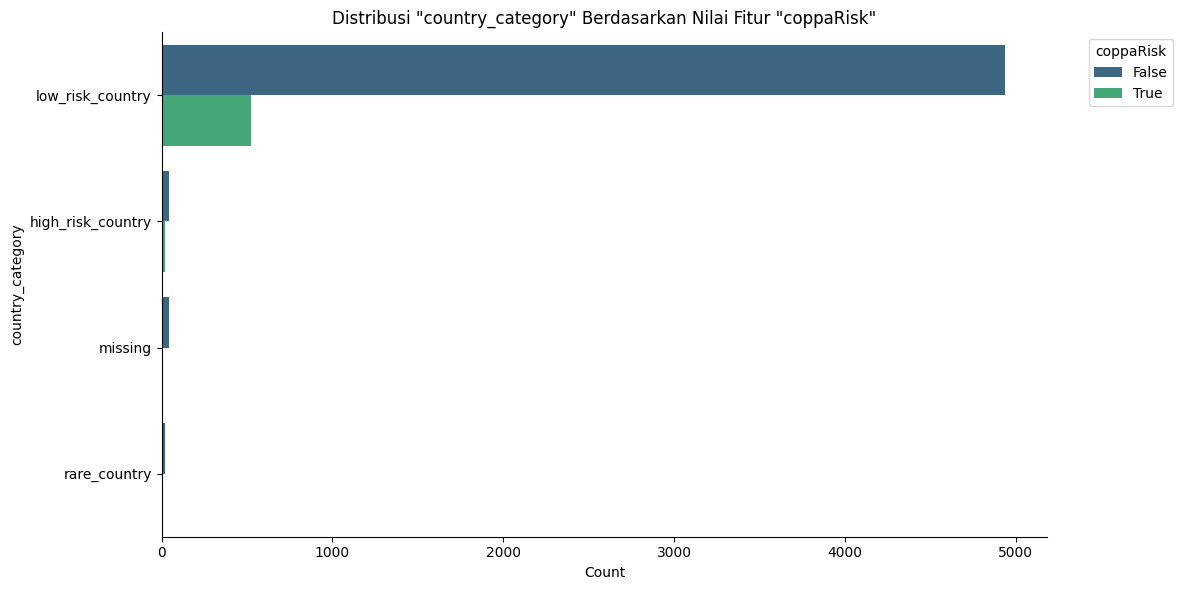

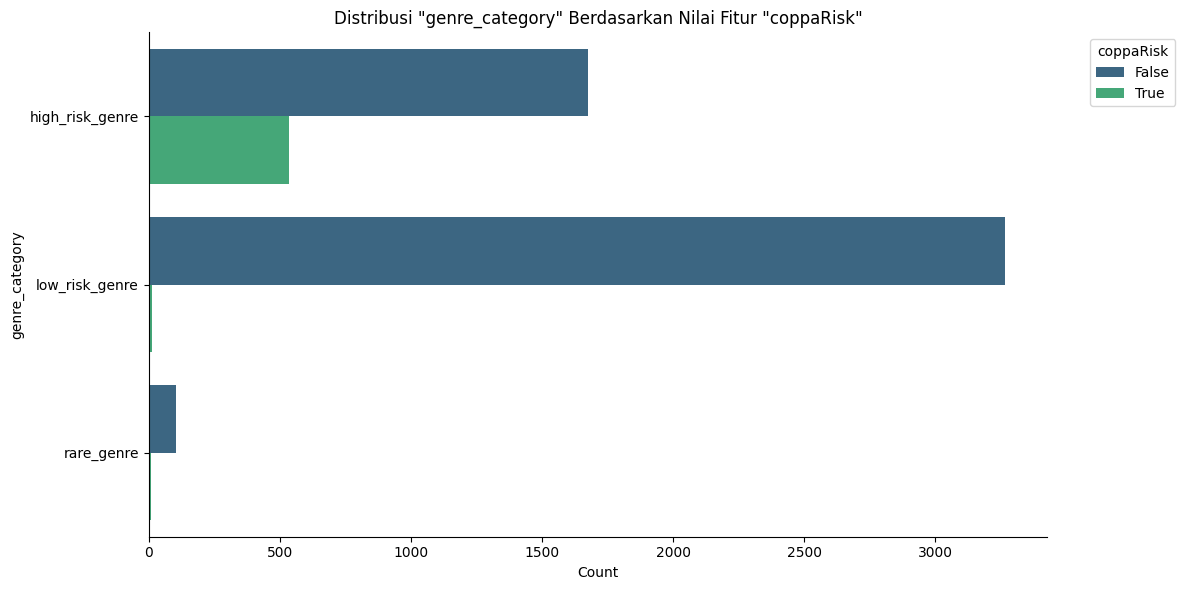

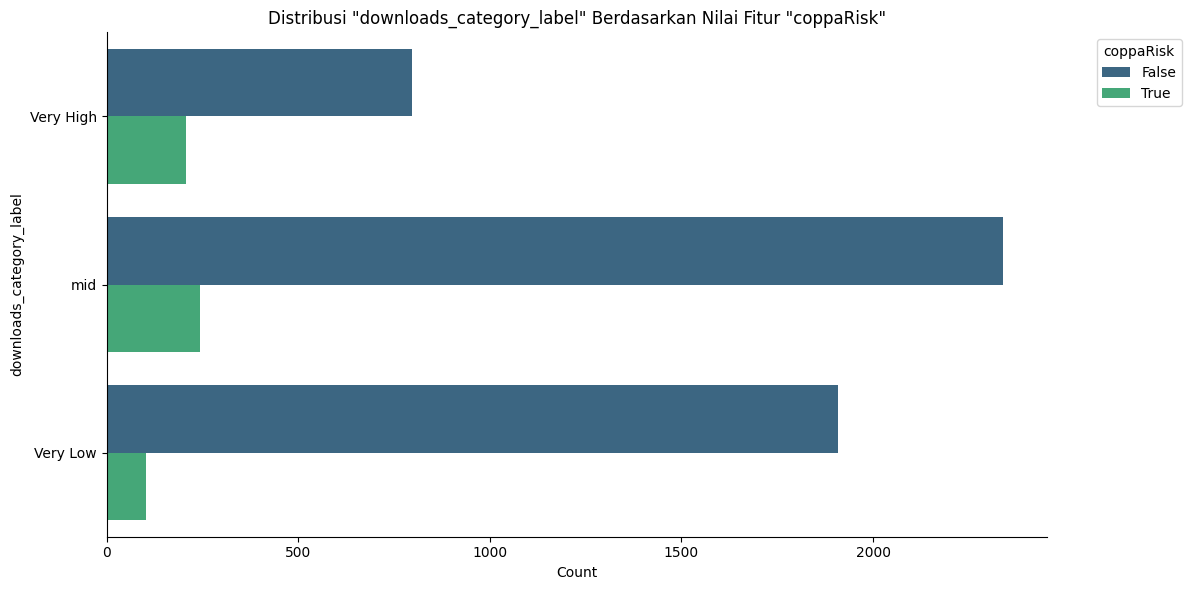

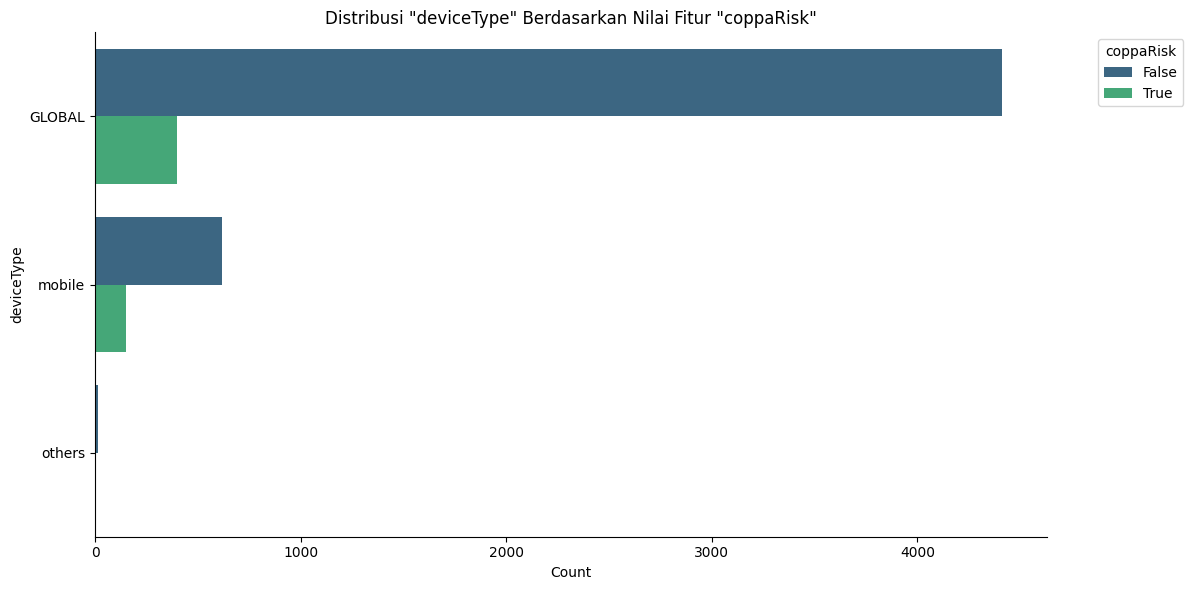

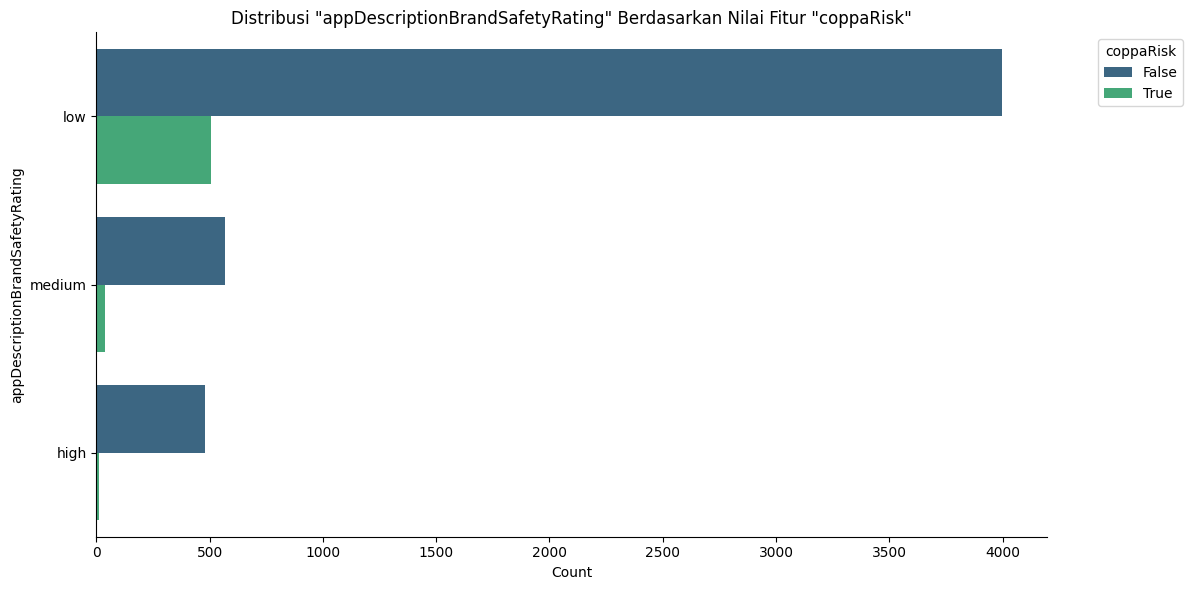

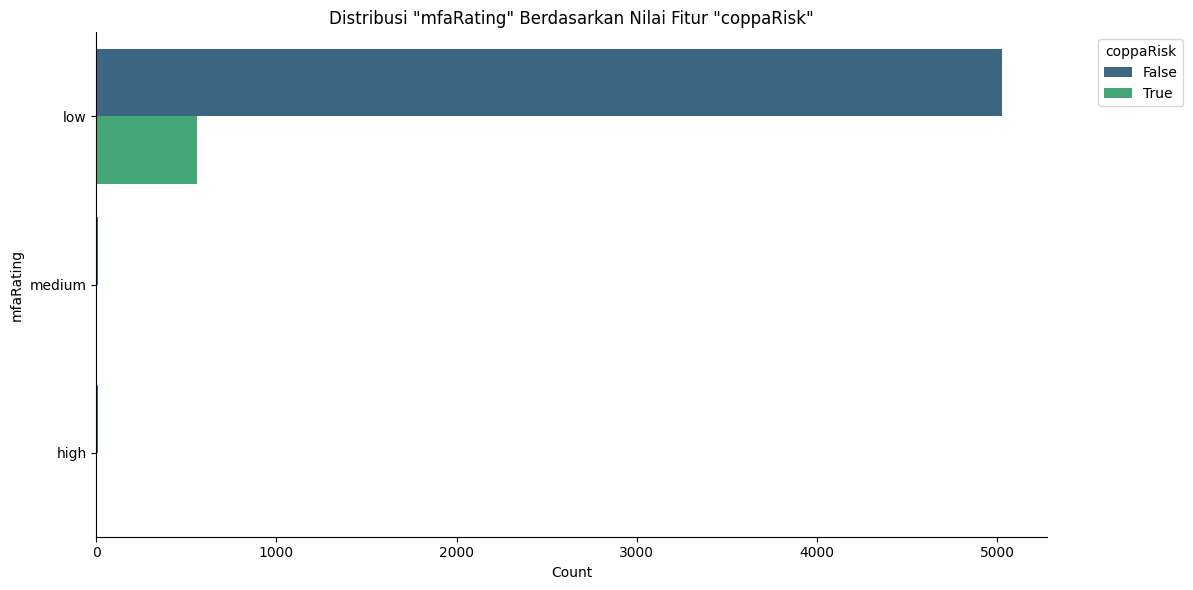

In [ ]:
columns_to_plot = [
    'country_category',
    'genre_category',
    'downloads_category_label',
    'deviceType',
    'appDescriptionBrandSafetyRating',
    'mfaRating'
]

# Loop untuk membuat countplot untuk masing-masing kolom
for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=col, hue='coppaRisk', data=df_train_imputed, palette='viridis')

    plt.title(f'Distribusi "{col}" Berdasarkan Nilai Fitur "coppaRisk"')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='coppaRisk', loc='upper right', bbox_to_anchor=(1.15, 1))

    # Styling tambahan
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    plt.tight_layout()
    plt.show()

#### **4.3.7. Encoding Fitur Kategorikal**

Hapus kembali fitur target pada X_train hasil imputasi.

In [ ]:
df_train_imputed = df_train_imputed.drop('coppaRisk', axis=1)

In [ ]:
nominal_cols = ['country_category', 'genre_category', 'deviceType']
ordinal_cols = ['downloads_category_label', 'appDescriptionBrandSafetyRating', 'mfaRating']

# Urutan kategori ordinal (pastikan sesuai)
downloads_category_label_order = ['Very Low', 'mid', 'Very High']
appDescriptionSafetyRating_order = ['low', 'medium', 'high']
mfaRating_order = ['low', 'medium', 'high']

# FIT ENCODER DI TRAIN SET
# One-hot encoder
final_onehot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_nom_encoded = final_onehot_enc.fit_transform(df_train_imputed[nominal_cols])

# Ordinal encoder
final_ordinal_enc = OrdinalEncoder(categories=[
    downloads_category_label_order,
    appDescriptionSafetyRating_order,
    mfaRating_order
])
X_train_ord_encoded = final_ordinal_enc.fit_transform(df_train_imputed[ordinal_cols])

# Ambil fitur numerik
X_train_num = df_train_imputed.drop(columns=nominal_cols + ordinal_cols).values

# Gabungkan semuanya untuk training
X_train_final = np.concatenate([X_train_nom_encoded, X_train_ord_encoded, X_train_num], axis=1)


# TRANSFORM VALIDATION SET
X_val_nom_encoded = final_onehot_enc.transform(df_val_imputed[nominal_cols])
X_val_ord_encoded = final_ordinal_enc.transform(df_val_imputed[ordinal_cols])
X_val_num = df_val_imputed.drop(columns=nominal_cols + ordinal_cols).values

X_val_final = np.concatenate([X_val_nom_encoded, X_val_ord_encoded, X_val_num], axis=1)

In [ ]:
X_train_final

array([[ 0.        ,  1.        ,  0.        , ..., 63.86666667,
         4.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., 48.23333333,
         4.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., 42.83333333,
         4.        ,  1.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., 12.33333333,
         0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., 44.86666667,
         4.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., 49.8       ,
         0.        ,  0.98537071]])

In [ ]:
X_val_final

array([[  0.        ,   1.        ,   0.        , ...,  64.16666667,
          2.        ,   0.98325469],
       [  0.        ,   1.        ,   0.        , ...,  34.23333333,
          4.        ,   1.        ],
       [  0.        ,   1.        ,   0.        , ...,  23.16666667,
          0.        ,   1.        ],
       ...,
       [  0.        ,   1.        ,   0.        , ...,  29.76666667,
          4.        ,   1.        ],
       [  0.        ,   1.        ,   0.        , ...,  63.16666667,
          1.        ,   1.        ],
       [  0.        ,   1.        ,   0.        , ..., 102.33333333,
          0.        ,   0.96597041]])

Konversi ke dataframe pandas.

In [ ]:
onehot_feature_names = final_onehot_enc.get_feature_names_out(nominal_cols)

# Gabungkan semua nama kolom
feature_names = list(onehot_feature_names) + ordinal_cols + list(df_train_imputed.drop(columns=nominal_cols + ordinal_cols).columns)

# Konversi X_train_final dan X_val_final menjadi DataFrame
df_X_train_final = pd.DataFrame(X_train_final, columns=feature_names, index=df_train_imputed.index)
df_X_val_final = pd.DataFrame(X_val_final, columns=feature_names, index=df_val_imputed.index)

In [ ]:
df_X_train_final

,country_category_high_risk_country,country_category_low_risk_country,country_category_missing,country_category_rare_country,genre_category_high_risk_genre,genre_category_low_risk_genre,genre_category_rare_genre,deviceType_GLOBAL,deviceType_mobile,deviceType_others,downloads_category_label,appDescriptionBrandSafetyRating,mfaRating,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,hasPrivacyLink
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10994.0,0.000000,63.866667,4.0,1.000000
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,30341.0,99.000000,48.233333,4.0,1.000000
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.000000,42.833333,4.0,1.000000
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.645821,59.166667,0.0,1.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,55705.0,99.000000,44.766667,4.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,0.000000,53.366667,5.0,1.000000
5596,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,99.000000,27.666667,1.0,1.000000
5597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,12.333333,0.0,1.000000
5598,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,68.0,31.344753,44.866667,4.0,1.000000


In [ ]:
df_X_val_final

,country_category_high_risk_country,country_category_low_risk_country,country_category_missing,country_category_rare_country,genre_category_high_risk_genre,genre_category_low_risk_genre,genre_category_rare_genre,deviceType_GLOBAL,deviceType_mobile,deviceType_others,downloads_category_label,appDescriptionBrandSafetyRating,mfaRating,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,hasPrivacyLink
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667,2.0,0.983255
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.000000,34.233333,4.0,1.000000
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,23.166667,0.0,1.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,44.698232,22.066667,1.0,1.000000
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,36.833333,2.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.0,47.339256,93.733333,4.0,1.000000
1396,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,6219.0,99.000000,35.966667,4.0,1.000000
1397,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,94.0,0.000000,29.766667,4.0,1.000000
1398,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,99.000000,63.166667,1.0,1.000000


Karena pada project ini model yang akan digunakan adalah model berbasis tree, maka proses normalisasi atau standarisasi fitur tidak perlu dilakukan.

## **5. Pembangunan Model**

Menyesuaikan nilai fitur target pada training set dan validation set agar menjadi nilai biner 0 dan 1.

In [ ]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)

Implementasi cost-sensitive learning

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

### **5.1. Model Selection**

#### **5.1.1. Hyperparameter Tuning dengan Optuna**

Menyiapkan OpenCL agar dapat menggunakan GPU NVIDIA untuk proses komputasi.

In [ ]:
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

In [ ]:
best_results = {
    'CatBoost': {'params': None, 'auc': 0},
    'XGBoost': {'params': None, 'auc': 0},
    'LightGBM': {'params': None, 'auc': 0}
}

def objective(trial):
    model_name = trial.suggest_categorical('model_name', ['CatBoost', 'XGBoost', 'LightGBM'])

    if model_name == 'CatBoost':
        params = {
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
            'min_child_samples': trial.suggest_int("min_child_samples", 5, 20),
            'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
            # 'cat_features': cat_features, # tidak perlu ditambahkan karena variabel kategorikal sudah di-encode
            'loss_function': 'Logloss',
            'bootstrap_type': 'Bernoulli',
            'class_weights': class_weights_dict,
            'border_count': trial.suggest_int('border_count', 32, 255),
            'random_strength': trial.suggest_float('random_strength', 1, 20),
            'random_seed': 42,
            'task_type': 'GPU',
            'verbose': 0
        }
        model = CatBoostClassifier(**params)

    elif model_name == 'XGBoost':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
            'max_depth': trial.suggest_int('max_depth', 4, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'min_child_weight': trial.suggest_int("min_child_weight", 5, 15),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'reg_lambda': trial.suggest_loguniform("reg_lambda", 1, 10),
            'reg_alpha': trial.suggest_loguniform("reg_alpha", 1, 10),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'scale_pos_weight': class_weights_dict[1] / class_weights_dict[0],
            'use_label_encoder': False,
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'tree_method': 'gpu_hist',
            'random_state': 42,
            'verbosity': 0
        }
        model = XGBClassifier(**params)

    elif model_name == 'LightGBM':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
            'max_depth': trial.suggest_int('max_depth', 4, 12),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'num_leaves': trial.suggest_int('num_leaves', 20, 100),
            'min_child_weight': trial.suggest_int("min_child_weight", 5, 15),
            'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
            'reg_lambda': trial.suggest_loguniform("reg_lambda", 1, 10),
            'reg_alpha': trial.suggest_loguniform("reg_alpha", 1, 10),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
            'scale_pos_weight': class_weights_dict[1] / class_weights_dict[0],
            'objective': 'binary',
            'metric': 'auc',
            'random_state': 42,
            'device': "gpu",
            'verbosity': 1
        }
        model = LGBMClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(
        model, df_X_train_final, y_train, cv=skf, scoring='roc_auc', n_jobs=-1
    )
    mean_cv_score = cv_scores.mean()

    if mean_cv_score > best_results[model_name]['auc']:
        best_results[model_name]['params'] = params
        best_results[model_name]['auc'] = mean_cv_score

    return mean_cv_score

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Tampilkan hasil
for model_name, result in best_results.items():
    print(f"Best hyperparameters for {model_name}: {result['params']}")
    print(f"Best AUC for {model_name}: {result['auc']:.4f}")

[I 2025-04-12 23:24:25,355] A new study created in memory with name: no-name-cfcdc4f1-81d7-4a38-b1df-f81fe77a184c
<ipython-input-63-34e254ce7820>:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-63-34e254ce7820>:57: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-63-34e254ce7820>:58: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform("reg_l

#### **5.1.2. Evaluasi Model pada Data Validation**

In [ ]:
# Load hyperparameter terbaik untuk tiap model
best_catboost_params = best_results['CatBoost']['params']
best_xgboost_params = best_results['XGBoost']['params']
best_lightgbm_params = best_results['LightGBM']['params']

# Inisialisasi model dengan hyperparameter terbaik
catboost_model = CatBoostClassifier(**best_catboost_params)
xgboost_model = XGBClassifier(**best_xgboost_params)
lightgbm_model = LGBMClassifier(**best_lightgbm_params)

# List model dan namanya untuk iterasi
models = [
    ('CatBoost', catboost_model),
    ('XGBoost', xgboost_model),
    ('LightGBM', lightgbm_model)
]

# Dataframe kosong untuk menyimpan hasil
results = []

# Loop melalui setiap model, fit model, dan evaluasi pada data validation
for model_name, model in models:
    # Fit model pada data training
    model.fit(df_X_train_final, y_train)

    # Prediksi kelas dan probabilitas
    y_pred = model.predict(df_X_val_final)
    y_proba = model.predict_proba(df_X_val_final)[:, 1]  # Ambil probabilitas kelas positif

    # Hitung metrik evaluasi
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)

    # Tambahkan hasil ke list
    results.append({
        'Nama Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Balanced Accuracy': balanced_acc,
        'AUC': auc
    })

# Konversi hasil ke dalam dataframe
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Warning] feature_fraction is set=0.5405850236090899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5405850236090899
[LightGBM] [Warning] bagging_fraction is set=0.7496192462219053, subsample=0.9239690349553612 will be ignored. Current value: bagging_fraction=0.7496192462219053
[LightGBM] [Warning] feature_fraction is set=0.5405850236090899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5405850236090899
[LightGBM] [Warning] bagging_fraction is set=0.7496192462219053, subsample=0.9239690349553612 will be ignored. Current value: bagging_fraction=0.7496192462219053
[LightGBM] [Info] Number of positive: 547, number of negative: 5001
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 5548, number of used features: 14
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins..

,Nama Model,Precision,Recall,F1-Score,Balanced Accuracy,AUC
0,CatBoost,0.287946,0.941606,0.441026,0.843305,0.866953
1,XGBoost,0.275964,0.678832,0.392405,0.741894,0.858811
2,LightGBM,0.281928,0.854015,0.423913,0.807903,0.859601


Berdasarkan output di atas, terlihat bahwa model terbaik merupakan CatBoost karena memiliki nilai AUC (metrik evaluasi acuan) terbaik.

Visualisasi confusion matrix disajikan sebagai berikut.

Model Terbaik: CatBoost


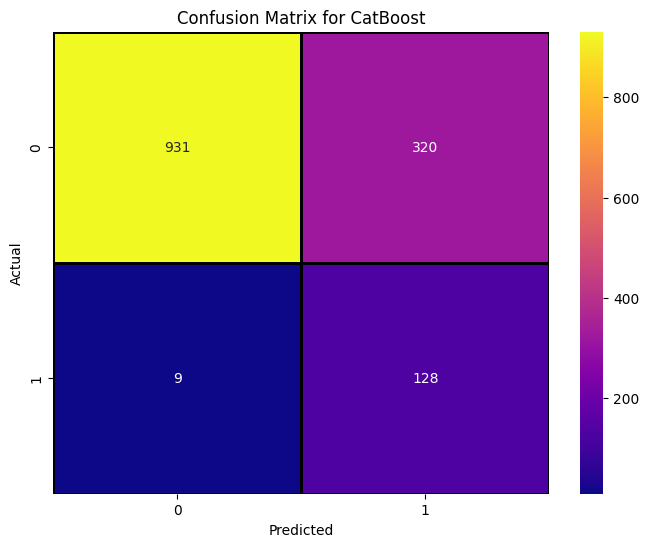

In [ ]:
best_model_name = results_df.loc[results_df['AUC'].idxmax(), 'Nama Model']
print(f"Model Terbaik: {best_model_name}")

# Inisialisasi model terbaik berdasarkan nama
if best_model_name == 'CatBoost':
    best_model = CatBoostClassifier(**best_catboost_params)
elif best_model_name == 'XGBoost':
    best_model = XGBClassifier(**best_xgboost_params)
elif best_model_name == 'LightGBM':
    best_model = LGBMClassifier(**best_lightgbm_params)

# Fit model terbaik pada data training
best_model.fit(df_X_train_final, y_train)

# Prediksi pada data testing menggunakan model terbaik
y_pred_best = best_model.predict(df_X_val_final)

# Hitung confusion matrix
cm_best = confusion_matrix(y_val, y_pred_best)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='plasma', cbar=True, linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

Clasification Report

In [ ]:
clf_report_best = classification_report(y_val, y_pred_best, output_dict=True)
rep_best_df = pd.DataFrame(clf_report_best).transpose()
rep_best_df

,precision,recall,f1-score,support
0,0.990426,0.744205,0.849840,1251.000000
1,0.285714,0.934307,0.437607,137.000000
accuracy,0.762968,0.762968,0.762968,0.762968
macro avg,0.638070,0.839256,0.643724,1388.000000
weighted avg,0.920868,0.762968,0.809152,1388.000000


Menampilkan feature importance yang akan dijadikan sebagai bahan untuk feature selection.

<ipython-input-74-26812b07fdcc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=feature_importance_df.head(20), palette='viridis')


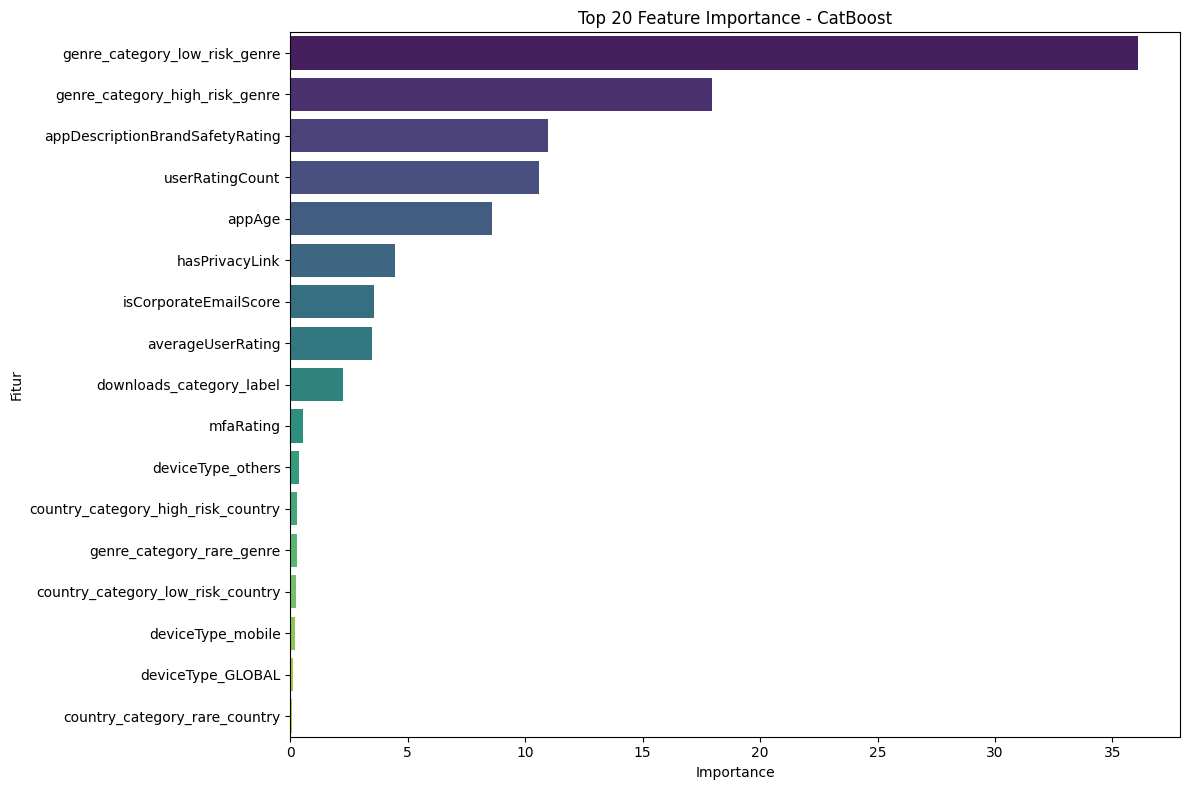

,Fitur,Importance
4,genre_category_low_risk_genre,36.072948
3,genre_category_high_risk_genre,17.963183
10,appDescriptionBrandSafetyRating,10.953968
12,userRatingCount,10.570201
14,appAge,8.578491
16,hasPrivacyLink,4.436950
13,isCorporateEmailScore,3.548732
15,averageUserRating,3.495082
9,downloads_category_label,2.253363
11,mfaRating,0.561144


In [ ]:
# Ambil nama fitur dari df_X_train_final
feature_names = df_X_train_final.columns

# Ambil feature importance dari model terbaik
importances = best_model.feature_importances_

# Buat DataFrame untuk menampilkan feature importance
feature_importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan 20 fitur teratas
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Fitur', data=feature_importance_df.head(20), palette='viridis')
plt.title(f'Top 20 Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

# Tampilkan tabel
feature_importance_df.head(20)

Menyimpan model sebelum feature selection untuk reproducibility

In [ ]:
joblib.dump(best_model, f"{best_model_name}_best_model_attempt1_tanpa_feature_selection.pkl")
print(f"Model {best_model_name} telah disimpan")

Model CatBoost telah disimpan


#### **5.1.3. Feature Selection**

Feature selection dilakukan dengan mengambil fitur yang memiliki importance lebih dari 1.0.

In [ ]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 1.0]['Fitur']
X_train_selected = df_X_train_final[selected_features]
X_val_selected = df_X_val_final[selected_features]

Training ulang model pada data hasil feature selection.

In [ ]:
best_results = {
    'CatBoost': {'params': None, 'auc': 0},
    'XGBoost': {'params': None, 'auc': 0},
    'LightGBM': {'params': None, 'auc': 0}
}

def objective(trial):
    model_name = trial.suggest_categorical('model_name', ['CatBoost', 'XGBoost', 'LightGBM'])

    if model_name == 'CatBoost':
        params = {
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
            'min_child_samples': trial.suggest_int("min_child_samples", 5, 20),
            'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
            # 'cat_features': cat_features, # tidak perlu ditambahkan karena variabel kategorikal sudah di-encode
            'loss_function': 'Logloss',
            'bootstrap_type': 'Bernoulli',
            'class_weights': class_weights_dict,
            'border_count': trial.suggest_int('border_count', 32, 255),
            'random_strength': trial.suggest_float('random_strength', 1, 20),
            'random_seed': 42,
            'task_type': 'GPU',
            'verbose': 0
        }
        model = CatBoostClassifier(**params)

    elif model_name == 'XGBoost':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
            'max_depth': trial.suggest_int('max_depth', 4, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'min_child_weight': trial.suggest_int("min_child_weight", 5, 15),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'reg_lambda': trial.suggest_loguniform("reg_lambda", 1, 10),
            'reg_alpha': trial.suggest_loguniform("reg_alpha", 1, 10),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'scale_pos_weight': class_weights_dict[1] / class_weights_dict[0],
            'use_label_encoder': False,
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'tree_method': 'gpu_hist',
            'random_state': 42,
            'verbosity': 0
        }
        model = XGBClassifier(**params)

    elif model_name == 'LightGBM':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
            'max_depth': trial.suggest_int('max_depth', 4, 12),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'num_leaves': trial.suggest_int('num_leaves', 20, 100),
            'min_child_weight': trial.suggest_int("min_child_weight", 5, 15),
            'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
            'reg_lambda': trial.suggest_loguniform("reg_lambda", 1, 10),
            'reg_alpha': trial.suggest_loguniform("reg_alpha", 1, 10),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
            'scale_pos_weight': class_weights_dict[1] / class_weights_dict[0],
            'objective': 'binary',
            'metric': 'auc',
            'random_state': 42,
            'device': "gpu",
            'verbosity': 1
        }
        model = LGBMClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(
        model, X_train_selected, y_train, cv=skf, scoring='roc_auc', n_jobs=-1
    )
    mean_cv_score = cv_scores.mean()

    if mean_cv_score > best_results[model_name]['auc']:
        best_results[model_name]['params'] = params
        best_results[model_name]['auc'] = mean_cv_score

    return mean_cv_score

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Tampilkan hasil
for model_name, result in best_results.items():
    print(f"Best hyperparameters for {model_name}: {result['params']}")
    print(f"Best AUC for {model_name}: {result['auc']:.4f}")

[I 2025-04-12 06:32:11,627] A new study created in memory with name: no-name-e43e1d57-5f27-43ec-9ab3-3c1d55102833
<ipython-input-79-e665a0ba9ed7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-79-e665a0ba9ed7>:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-79-e665a0ba9ed7>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_l

Best hyperparameters for CatBoost: {'depth': 6, 'learning_rate': 0.014316048234469615, 'n_estimators': 1845, 'min_child_samples': 6, 'subsample': 0.6822372595652207, 'l2_leaf_reg': 1.2526655213890152, 'loss_function': 'Logloss', 'bootstrap_type': 'Bernoulli', 'class_weights': {0: 0.5547024952015355, 1: 5.0701754385964914}, 'border_count': 50, 'random_strength': 3.453662960663551, 'random_seed': 42, 'task_type': 'GPU', 'verbose': 0}
Best AUC for CatBoost: 0.8654
Best hyperparameters for XGBoost: None
Best AUC for XGBoost: 0.0000
Best hyperparameters for LightGBM: {'n_estimators': 1871, 'max_depth': 9, 'learning_rate': 0.24530972917090857, 'num_leaves': 29, 'min_child_weight': 10, 'subsample': 0.8107449289947282, 'reg_lambda': 3.6424940090312554, 'reg_alpha': 5.180751167571764, 'feature_fraction': 0.6307025538288416, 'bagging_fraction': 0.8582711085498285, 'scale_pos_weight': 9.140350877192983, 'objective': 'binary', 'metric': 'auc', 'random_state': 42, 'device': 'gpu', 'verbosity': 1}
B

Evaluasi pada data validation

In [ ]:
# Load hyperparameter terbaik untuk tiap model
best_catboost_params = best_results['CatBoost']['params']
# best_xgboost_params = best_results['XGBoost']['params']
best_lightgbm_params = best_results['LightGBM']['params']

# Inisialisasi model dengan hyperparameter terbaik
catboost_model = CatBoostClassifier(**best_catboost_params)
# xgboost_model = XGBClassifier(**best_xgboost_params)
lightgbm_model = LGBMClassifier(**best_lightgbm_params)

# List model dan namanya untuk iterasi
models = [
    ('CatBoost', catboost_model),
    # ('XGBoost', xgboost_model),
    ('LightGBM', lightgbm_model)
]

# Dataframe kosong untuk menyimpan hasil
results = []

# Loop melalui setiap model, fit model, dan evaluasi pada data validation
for model_name, model in models:
    # Fit model pada data training
    model.fit(X_train_selected, y_train)

    # Prediksi kelas dan probabilitas
    y_pred = model.predict(X_val_selected)
    y_proba = model.predict_proba(X_val_selected)[:, 1]  # Ambil probabilitas kelas positif

    # Hitung metrik evaluasi
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)

    # Tambahkan hasil ke list
    results.append({
        'Nama Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Balanced Accuracy': balanced_acc,
        'AUC': auc
    })

# Konversi hasil ke dalam dataframe
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Warning] feature_fraction is set=0.6307025538288416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6307025538288416
[LightGBM] [Warning] bagging_fraction is set=0.8582711085498285, subsample=0.8107449289947282 will be ignored. Current value: bagging_fraction=0.8582711085498285
[LightGBM] [Warning] feature_fraction is set=0.6307025538288416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6307025538288416
[LightGBM] [Warning] bagging_fraction is set=0.8582711085498285, subsample=0.8107449289947282 will be ignored. Current value: bagging_fraction=0.8582711085498285
[LightGBM] [Info] Number of positive: 547, number of negative: 5001
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 5548, number of used features: 9
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...

,Nama Model,Precision,Recall,F1-Score,Balanced Accuracy,AUC
0,CatBoost,0.280973,0.927007,0.431239,0.833608,0.863301
1,LightGBM,0.295129,0.751825,0.423868,0.777591,0.862122


Berdasarkan output di atas, terlihat bahwa model terbaik pada kasus ini setelah feature selection dilakukan tetap CatBoost dengan nilai AUC tertinggi. Namun, peningkatan nilai AUC setelah feature selection dilakukan ternyata tidak begitu signifikan.

Visualisasi confusion matrix disajikan sebagai berikut.

Model Terbaik: CatBoost


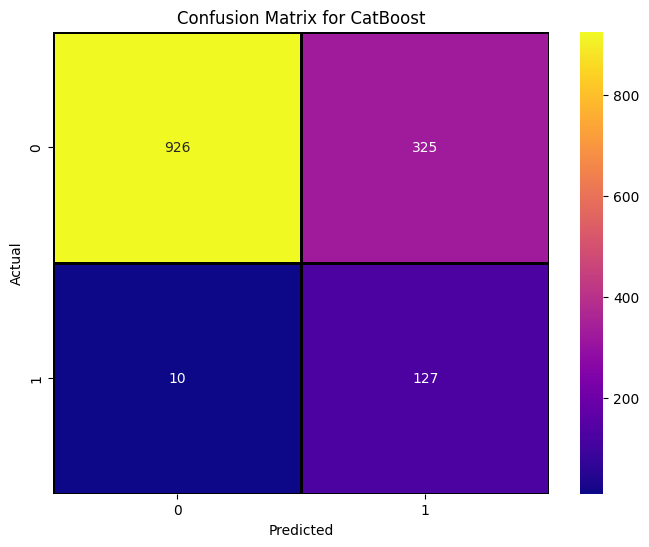

In [ ]:
best_model_name = results_df.loc[results_df['AUC'].idxmax(), 'Nama Model']
print(f"Model Terbaik: {best_model_name}")

# Inisialisasi model terbaik berdasarkan nama
if best_model_name == 'CatBoost':
    best_model = CatBoostClassifier(**best_catboost_params)
elif best_model_name == 'XGBoost':
    best_model = XGBClassifier(**best_xgboost_params)
elif best_model_name == 'LightGBM':
    best_model = LGBMClassifier(**best_lightgbm_params)

# Fit model terbaik pada data training
best_model.fit(X_train_selected, y_train)

# Prediksi pada data testing menggunakan model terbaik
y_pred_best = best_model.predict(X_val_selected)

# Hitung confusion matrix
cm_best = confusion_matrix(y_val, y_pred_best)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='plasma', cbar=True, linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

Classification report.

In [ ]:
clf_report_best = classification_report(y_val, y_pred_best, output_dict=True)
rep_best_df = pd.DataFrame(clf_report_best).transpose()
rep_best_df

,precision,recall,f1-score,support
0,0.989316,0.740208,0.846822,1251.000000
1,0.280973,0.927007,0.431239,137.000000
accuracy,0.758646,0.758646,0.758646,0.758646
macro avg,0.635145,0.833608,0.639031,1388.000000
weighted avg,0.919401,0.758646,0.805803,1388.000000


Menyimpan model setelah feature selection untuk reproducibility

In [ ]:
joblib.dump(best_model, f"{best_model_name}_best_model_attempt1_dengan_feature_selection.pkl")
print(f"Model {best_model_name} telah disimpan")

Model CatBoost telah disimpan
